In [1]:
import datetime

import pandas as pd
import numpy as np
from scipy.optimize import minimize

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

In [2]:
from covid_tracking_data.collector import *
from covid_analysis.utility import *
from covid_analysis.models import *
from ourworldindata_org.collector import get_dataset_df_from_file as get_world_dataset_df_from_file

In [3]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

### Fetch data set from local disk

In [4]:
!ls ~/data/
# gets thte latest file names
recent = ! ls -drt ~/data/* | tail -n 2
print("Latest files are:\n\t{}\n\t{}".format(*recent))

2020-03-24_1744_state_daily_data.csv 2020-03-26_1604_state_rank.csv
2020-03-24_1744_state_rank.csv       2020-03-26_1748_state_daily_data.csv
2020-03-24_1829_state_daily_data.csv 2020-03-26_1748_state_rank.csv
2020-03-24_1829_state_rank.csv       2020-03-26_2209_state_daily_data.csv
2020-03-24_2013_state_daily_data.csv 2020-03-26_2209_state_rank.csv
2020-03-24_2013_state_rank.csv       2020-03-26_2303_state_daily_data.csv
2020-03-24_2046_state_daily_data.csv 2020-03-26_2303_state_rank.csv
2020-03-24_2046_state_rank.csv       2020-03-27_0119_state_daily_data.csv
2020-03-24_2359_state_daily_data.csv 2020-03-27_0119_state_rank.csv
2020-03-24_2359_state_rank.csv       2020-03-27_0124_state_daily_data.csv
2020-03-25_0000_state_daily_data.csv 2020-03-27_0124_state_rank.csv
2020-03-25_0000_state_rank.csv       2020-03-27_1459_state_daily_data.csv
2020-03-25_1516_state_daily_data.csv 2020-03-27_1459_state_rank.csv
2020-03-25_1516_state_rank.csv       2020-03-27_1911_state_daily_data.csv
2020-0

In [5]:
df, states_in_order = get_dataset_df_from_file(recent)
df.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,order,lastUpdateEt
0,2020-03-04,NY,6.0,48.0,24.0,NaN,NaN,78,1afd6e025157a38728847bbf42145c63b024c387,2020-03-04 21:00:00+00:00,54,36,NaN,NaN,NaN,NaN,NaN,0,2020-03-28 13:15:00
1,2020-03-05,NY,22.0,76.0,24.0,NaN,NaN,122,25c15099a4116ff026c04c0b4a6b3780ccba310b,2020-03-05 21:00:00+00:00,98,36,0.0,0.0,28.0,16.0,44.0,0,2020-03-28 13:15:00
2,2020-03-06,NY,33.0,92.0,236.0,NaN,NaN,361,1bd1fecfd3d23311c604ac6c27d05ce5835af2c5,2020-03-06 21:00:00+00:00,125,36,0.0,0.0,16.0,11.0,27.0,0,2020-03-28 13:15:00
3,2020-03-07,NY,76.0,92.0,236.0,NaN,NaN,404,d9b32dfe41c22decc86fe0a35515525a18b68fa9,2020-03-07 21:00:00+00:00,168,36,0.0,0.0,0.0,43.0,43.0,0,2020-03-28 13:15:00
4,2020-03-08,NY,105.0,92.0,NaN,NaN,NaN,197,22912a8c6cdefd796b1412292c796959a8cc088f,2020-03-08 20:00:00+00:00,197,36,0.0,0.0,0.0,29.0,29.0,0,2020-03-28 13:15:00


### SIR Model

In [6]:
dfq, _ = get_state_df(df, "*")

pos_untested = 0.6
dfq["actual_pos"] = dfq.positive.values*(1 + pos_untested)/1000
dfq.head()

,date,positive,negative,pending,lastUpdateEt,daily_new_positive,actual_pos
0,2020-03-04,118.0,748.0,103.0,2020-03-28 16:00:00,NaN,0.1888
1,2020-03-05,176.0,953.0,197.0,2020-03-28 16:00:00,58.0,0.2816
2,2020-03-06,223.0,1571.0,458.0,2020-03-28 16:00:00,47.0,0.3568
3,2020-03-07,341.0,1809.0,602.0,2020-03-28 16:00:00,118.0,0.5456
4,2020-03-08,417.0,2335.0,347.0,2020-03-28 16:00:00,76.0,0.6672


### SIR Fit

In [10]:
N=350000 
R0=0

In [11]:
x0 = (0.3896, 0.08149, 0.1)
c = dfq.actual_pos.values
a = minimize(SIRSSE, x0, args=(N, R0, c), method="Powell")

print(a)

/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


   direc: array([[-0.00776806,  0.00542448,  0.07831275],
       [ 0.        ,  1.        ,  0.        ],
       [-0.00110515,  0.00115382,  0.02433113]])
     fun: 392.95153590183173
 message: 'Optimization terminated successfully.'
    nfev: 556
     nit: 11
  status: 0
 success: True
       x: array([0.34134364, 0.11031429, 0.50545997])


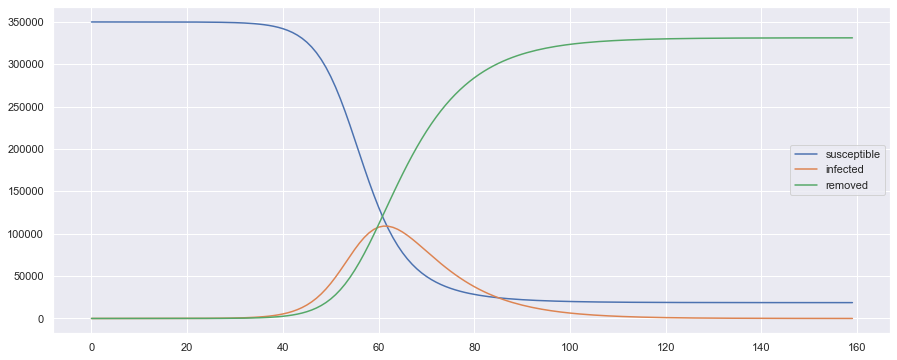

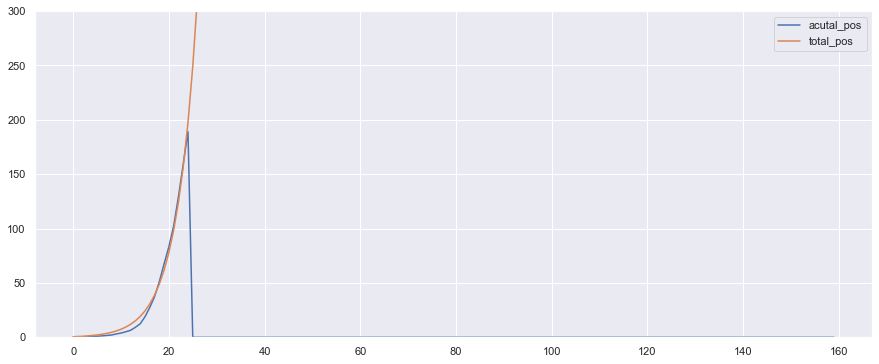

In [12]:
beta, gamma, I0 = a.x 

dfm = SIRModel(N=N, I0=I0, R0=R0, beta=beta, gamma=gamma)
dfm.plot(figsize=[15,6])   

start_index = 0

actual_pos = np.zeros((len(dfm)))
actual_pos[start_index: start_index + len(dfq)] += dfq.actual_pos

dfm["acutal_pos"] = actual_pos
dfm["total_pos"] = dfm.infected + dfm.removed

dfm.plot(y=["acutal_pos", "total_pos"], figsize=[15,6], ylim=[0,300])  

In [ ]:
# start after day with min_pos or more cases
min_pos = 10
last_n_days = None

# image
plt.figure(figsize=[15,15])

# state by state
for s in states_in_order:
    try:
        dfq, dt, lud = get_state_doubling_df(df, s, zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
        plt.plot(dfq["days_since_{}".format(min_pos)].values, dfq.log_positive.values)
        plt.annotate(s, (dfq["days_since_{}".format(min_pos)].values[-1], dfq.log_positive.values[-1]))
    except IndexError:
        pass

# All US image
try:
    dfq, dt, lud = get_state_doubling_df(df, "*", zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
    plt.plot(dfq["days_since_{}".format(min_pos)].values, dfq.log_positive.values)
    xus = int(.9* dfq["days_since_{}".format(min_pos)].values[-1])
    plt.annotate("US (dt={:1.2f}d)".format(dt), (xus , dfq.log_positive.values[-1]))
except IndexError:
    pass

plt.xlabel("days since positive >= {}".format(min_pos))
plt.ylabel("log(total_positive)")
plt.show()

### US Totals and Doubling Times

US Total Positive, doubling every 2.32 days
  as of 2020-03-28T11:00
  based on last 14 days of data


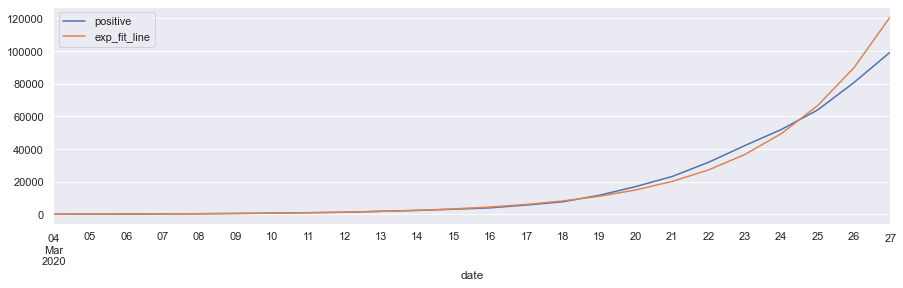

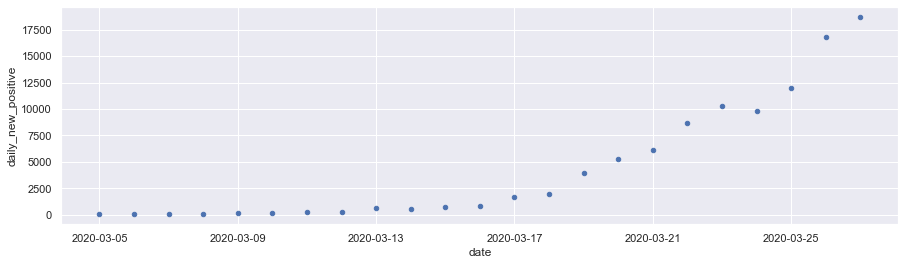

In [8]:
last_n_days = 14
dfa, dt, lud = get_state_doubling_df(df, "*", use_last_n_days=last_n_days)
lu = str(lud)[:16]
print("US Total Positive, doubling every {:.3} days\n  as of {}".format(dt, lu))
print("  based on last {} days of data".format(last_n_days))
dfa.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
dfa.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
plt.show()

### Testing

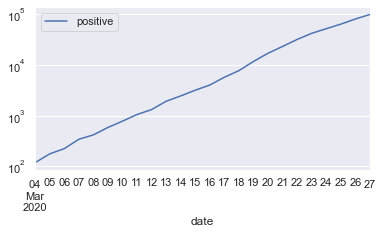

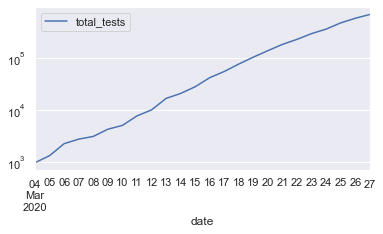

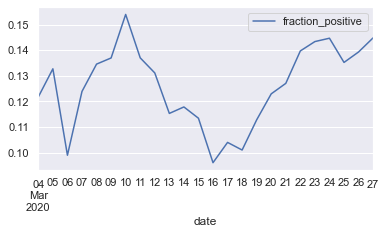

In [9]:
dfs, _ = get_state_df(df, "*")
dfs.head()
dfs["total_tests"] = dfs["positive"] + dfs["negative"] + dfs["pending"]
dfs["fraction_positive"] = dfs["positive"]/ dfs["total_tests"]
dfa.plot(x="date", y="positive", logy=True, figsize=[6,3])
dfs.plot("date", "total_tests", logy=True, figsize=[6,3])
dfs.plot("date", "fraction_positive", figsize=[6,3])

### Model of acutal infections with set perscentage of symptomatic or untested

### Current measured ratios and percentages

These are based on cases that test postive and test negative (state labs policies vary on this).

In [10]:
print("Current strategies for diagnosis give pos/neg tests ratio of {:.1%}".format(
    df.positive.sum()/(df.positive.sum() + df.negative.sum())))
print("on total tests tracked = {:,}".format(int(df.positive.sum() + df.negative.sum())))

Current strategies for diagnosis give pos/neg tests ratio of 14.6%
on total tests tracked = 3,094,110


In [11]:
pos_dr = df.death.sum()/df.positive.sum()
print("Current death/positive ratio of {:.1%}".format(pos_dr))

Current death/positive ratio of 1.4%


In [12]:
# projections of exp growth
print("US flu death rate average per month = 61,099/12 ≈ {}".format(int(61099/12)))
print("Using doubling time of {:2.2f} days".format(dt))
print("period      date         positive,     deaths              weekly rate")
print("-------------------------------------------------------------------------------------")
now, v = dfa[-1:][["date", "positive"]].values[0]
start, _ = dfa[1:][["date", "positive"]].values[0]
time_in_weeks = (now - start).total_seconds()/(86400*7)
pstr = "{:4}: {:%Y-%m-%d %H h}, {:10,d} [total deaths {:6,d}] Death Rate Avg = {:,d} per wk"
print(pstr.format(0, now, int(v), int(v*pos_dr), int(v*pos_dr/time_in_weeks)))

ddt = datetime.timedelta(days=dt)
for i in range(1,5):
    t = now + i*ddt
    time_in_weeks = (t - start).total_seconds()/(86400*7)
    v *= 2
    print(pstr.format(i,t,int(v), int(v*pos_dr), int(v*pos_dr/time_in_weeks)))
    

US flu death rate average per month = 61,099/12 ≈ 5091
Using doubling time of 2.32 days
period      date         positive,     deaths              weekly rate
-------------------------------------------------------------------------------------
   0: 2020-03-27 00 h,     99,447 [total deaths  1,379] Death Rate Avg = 439 per wk
   1: 2020-03-29 07 h,    198,894 [total deaths  2,759] Death Rate Avg = 794 per wk
   2: 2020-03-31 15 h,    397,788 [total deaths  5,518] Death Rate Avg = 1,450 per wk
   3: 2020-04-02 23 h,    795,576 [total deaths 11,037] Death Rate Avg = 2,667 per wk
   4: 2020-04-05 06 h,  1,591,152 [total deaths 22,075] Death Rate Avg = 4,939 per wk


### State Trends and Doubling Periods

State=NY  (last_update=2020-03-26T16:59)
Doubling every 1.89 days based on last 14 days of data
(naive estimates: current_unresolved=42935 hosp=6440 icu=1717)


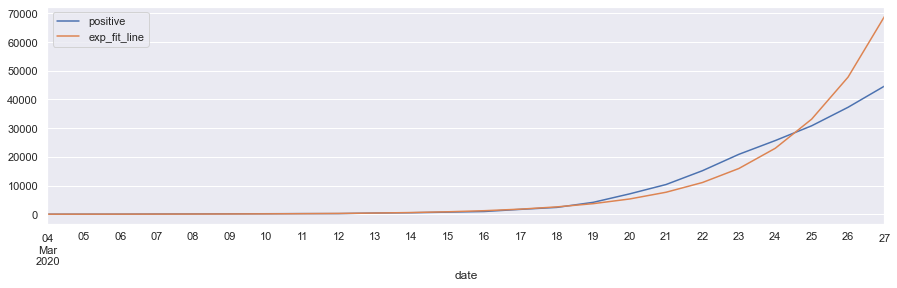

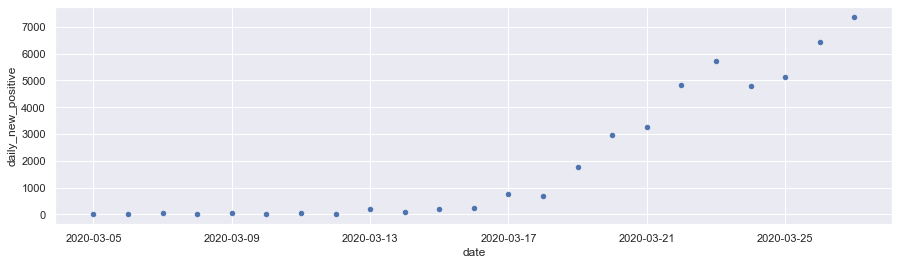

State=NJ  (last_update=2020-03-27T13:30)
Doubling every 1.81 days based on last 14 days of data
(naive estimates: current_unresolved=8558 hosp=1283 icu=342)


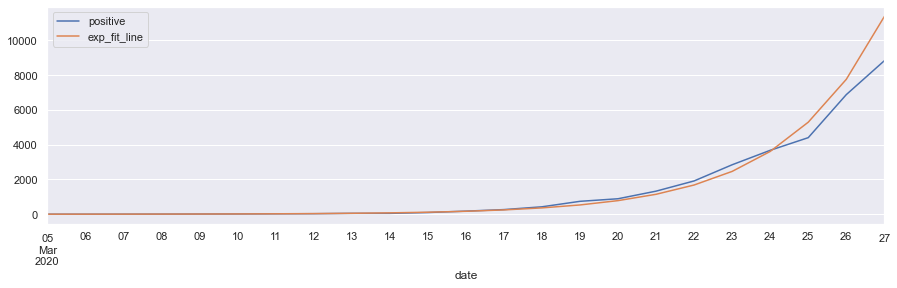

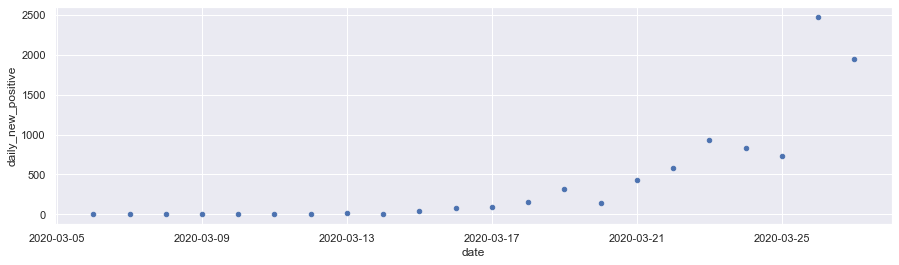

State=CA  (last_update=2020-03-27T00:00)
Doubling every 3.29 days based on last 14 days of data
(naive estimates: current_unresolved=3396 hosp=509 icu=135)


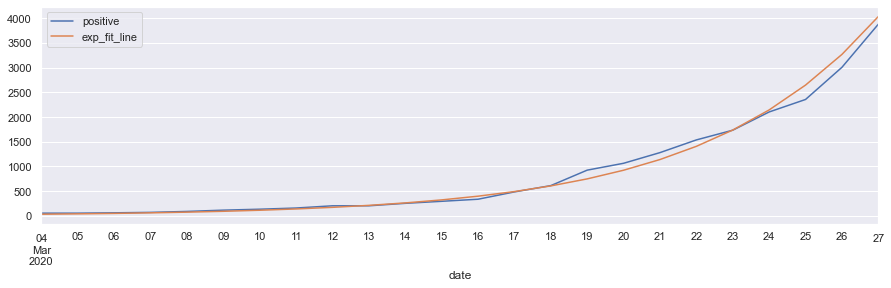

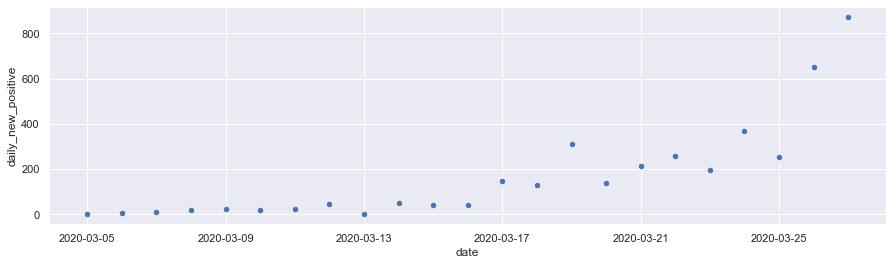

State=WA  (last_update=2020-03-27T18:30)
Doubling every 5.32 days based on last 14 days of data
(naive estimates: current_unresolved=2303 hosp=345 icu=92)


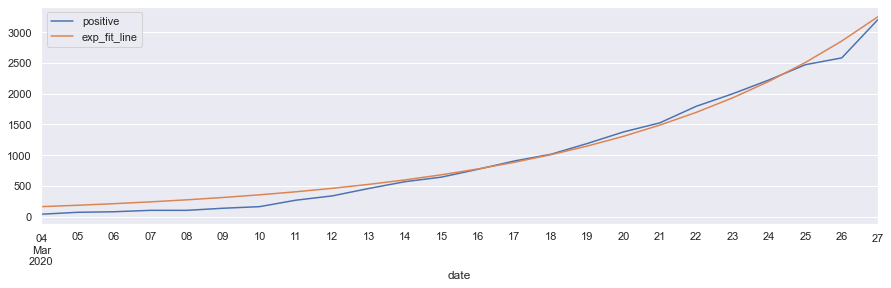

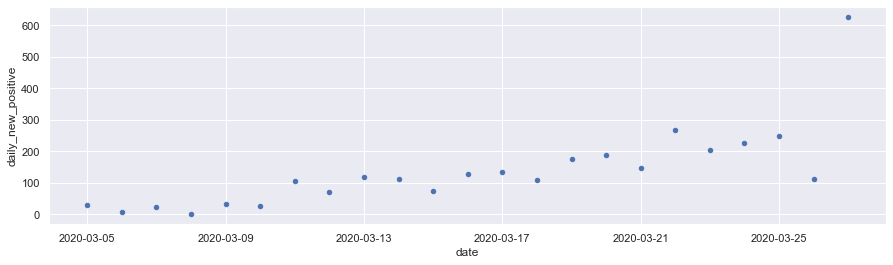

State=MI  (last_update=2020-03-27T16:00)
Doubling every 1.67 days based on last 14 days of data
(naive estimates: current_unresolved=3592 hosp=538 icu=143)


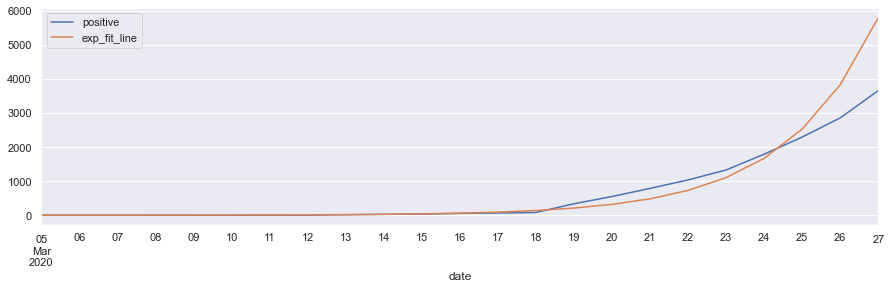

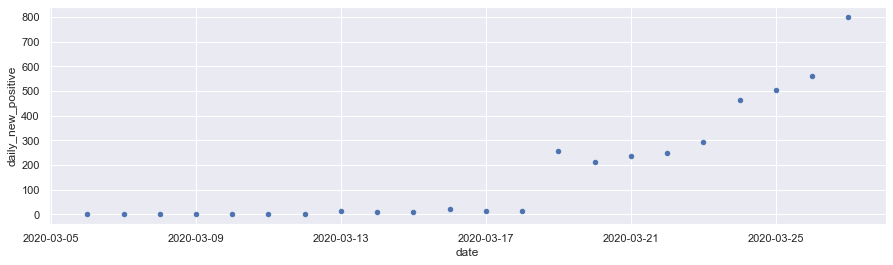

State=MA  (last_update=2020-03-27T12:30)
Doubling every 2.77 days based on last 14 days of data
(naive estimates: current_unresolved=3022 hosp=453 icu=120)


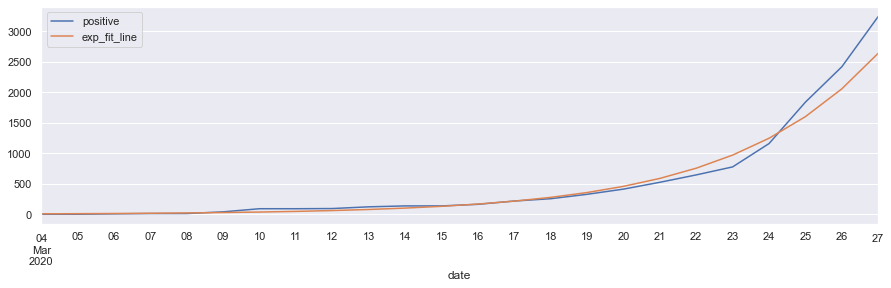

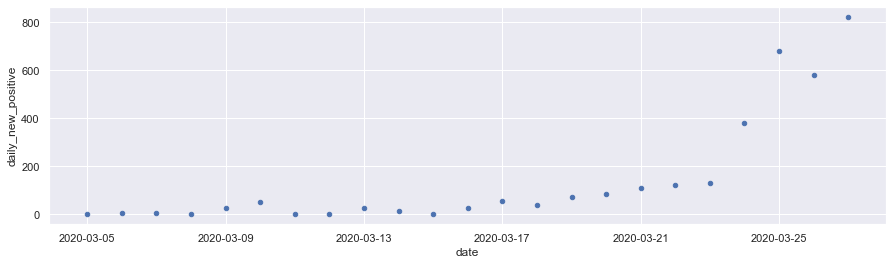

State=FL  (last_update=2020-03-27T19:00)
Doubling every 2.52 days based on last 14 days of data
(naive estimates: current_unresolved=2579 hosp=386 icu=103)


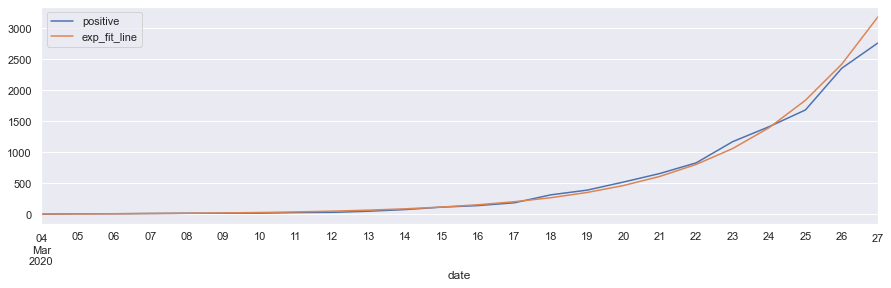

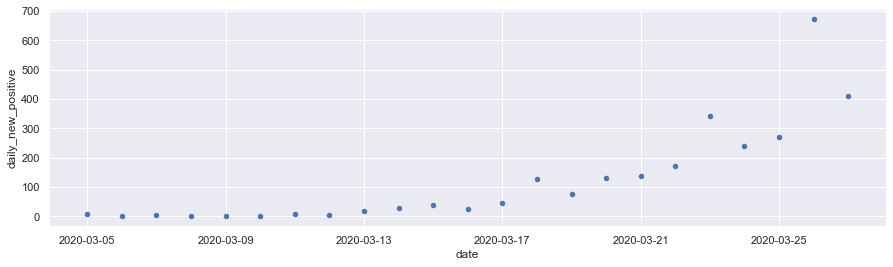

State=IL  (last_update=2020-03-27T00:00)
Doubling every 2.13 days based on last 14 days of data
(naive estimates: current_unresolved=2900 hosp=435 icu=116)


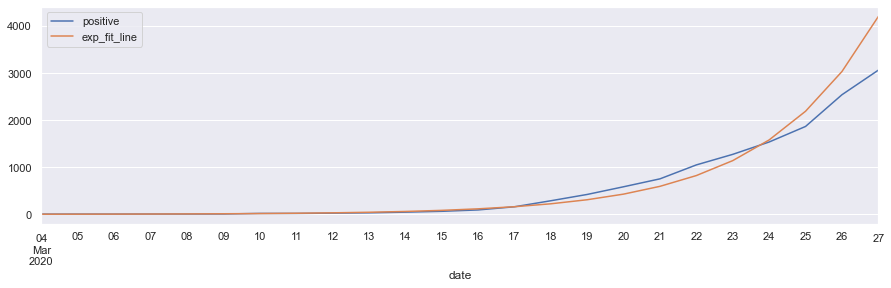

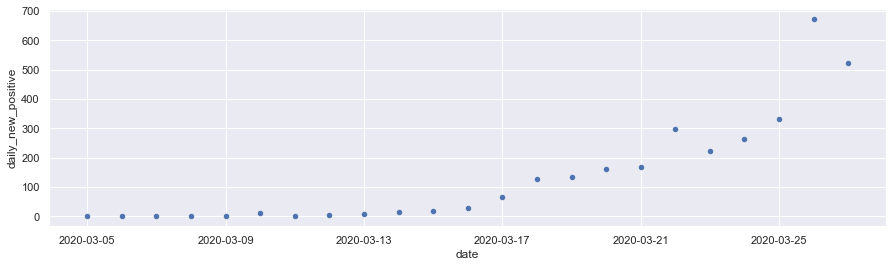

State=LA  (last_update=2020-03-27T13:00)
Doubling every 2.36 days based on last 14 days of data
(naive estimates: current_unresolved=2575 hosp=386 icu=103)


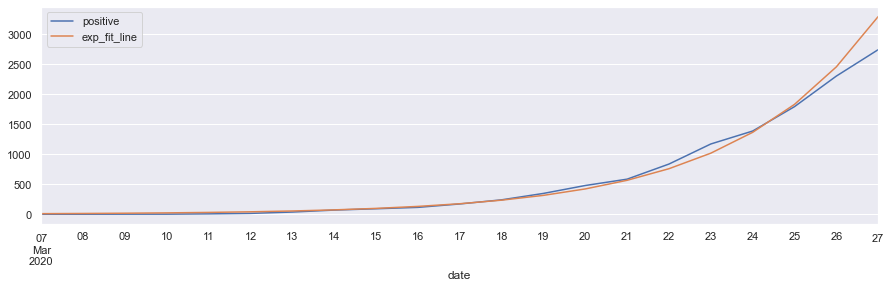

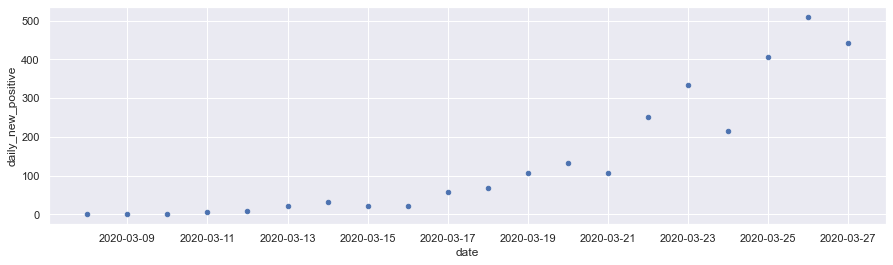

State=PA  (last_update=2020-03-27T12:00)
Doubling every 2.3 days based on last 14 days of data
(naive estimates: current_unresolved=2122 hosp=318 icu=84)


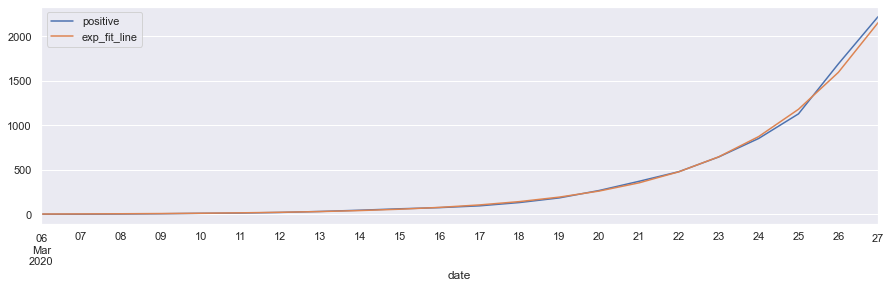

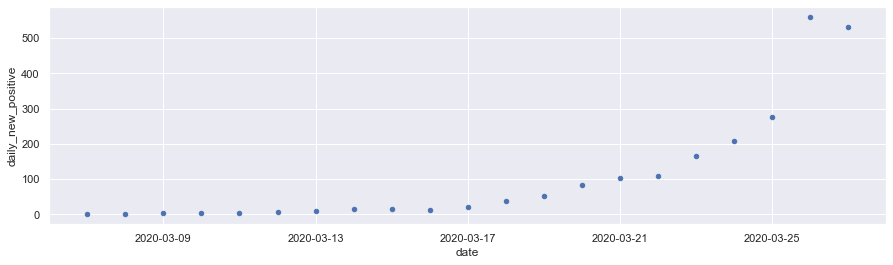

State=GA  (last_update=2020-03-27T18:27)
Doubling every 2.67 days based on last 14 days of data
(naive estimates: current_unresolved=1855 hosp=278 icu=74)


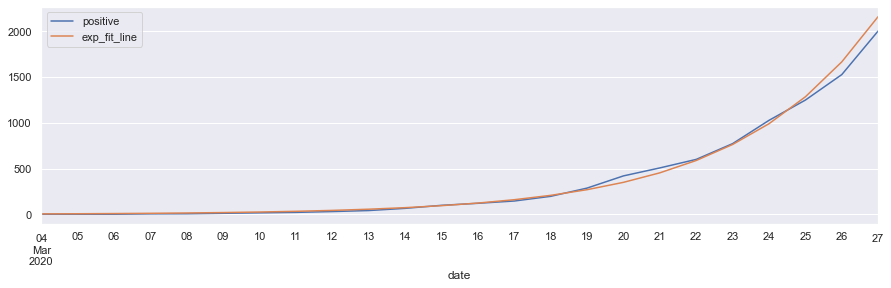

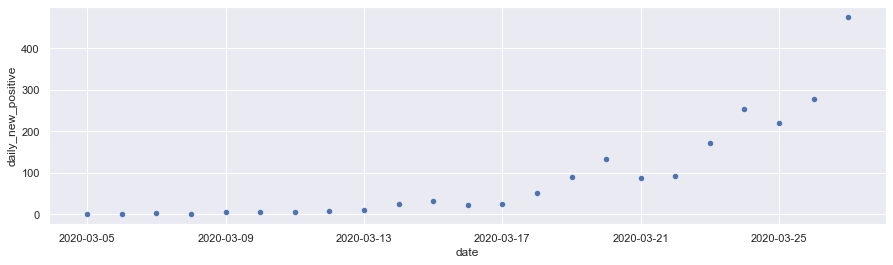

State=CO  (last_update=2020-03-26T18:00)
Doubling every 3.35 days based on last 14 days of data
(naive estimates: current_unresolved=1270 hosp=190 icu=50)


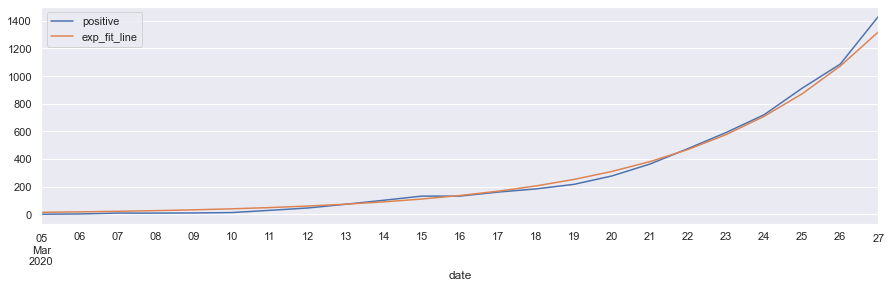

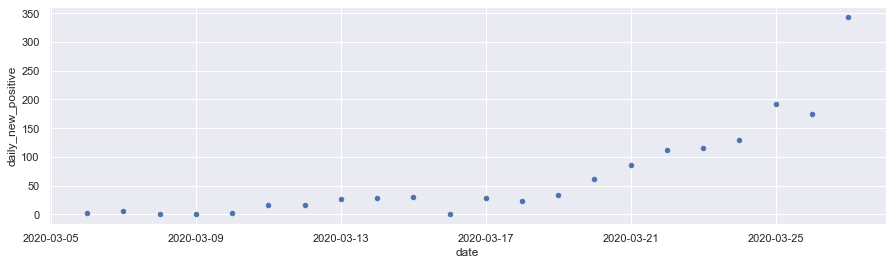

State=TX  (last_update=2020-03-27T13:00)
Doubling every 2.43 days based on last 14 days of data
(naive estimates: current_unresolved=1667 hosp=250 icu=66)


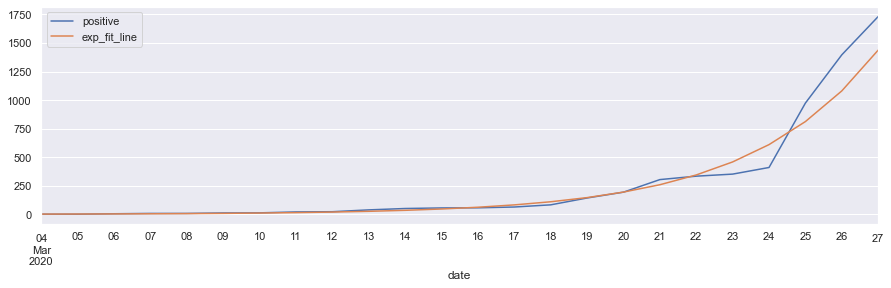

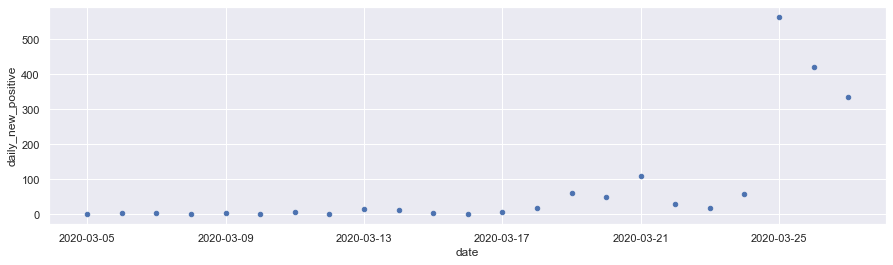

State=CT  (last_update=2020-03-27T13:30)
Doubling every 1.88 days based on last 14 days of data
(naive estimates: current_unresolved=1250 hosp=187 icu=50)


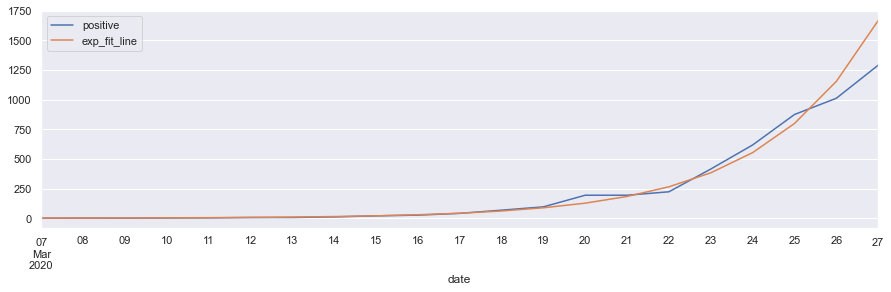

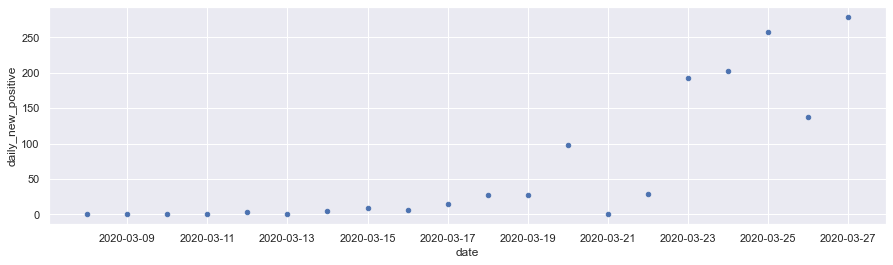

State=IN  (last_update=2020-03-28T11:00)
Doubling every 2.08 days based on last 14 days of data
(naive estimates: current_unresolved=951 hosp=142 icu=38)


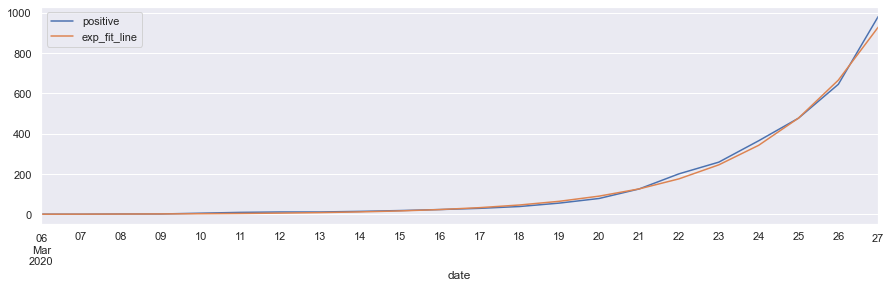

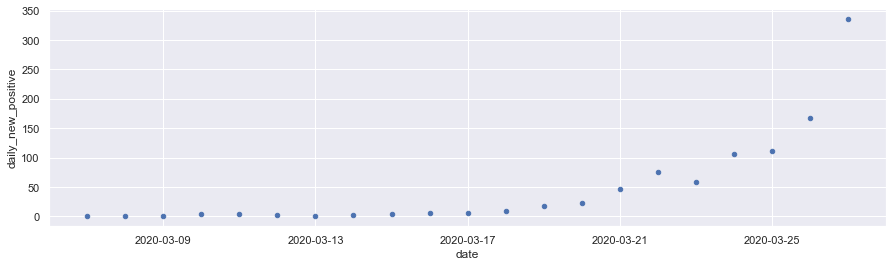

State=TN  (last_update=2020-03-27T15:00)
Doubling every 2.33 days based on last 14 days of data
(naive estimates: current_unresolved=1130 hosp=169 icu=45)


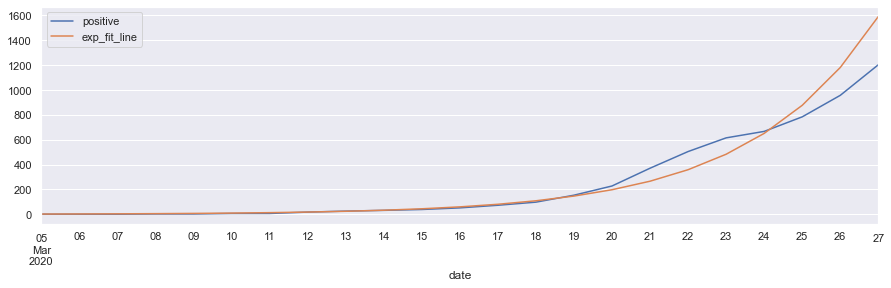

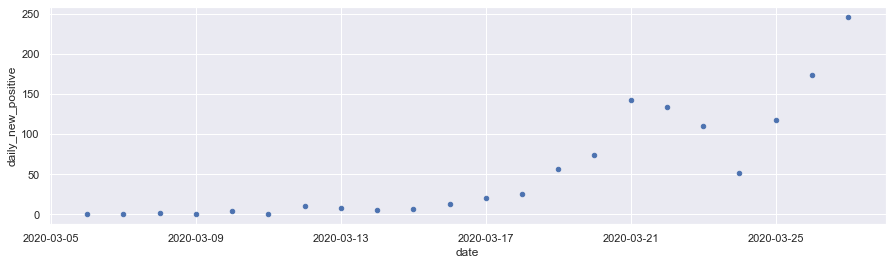

State=OH  (last_update=2020-03-27T14:00)
Doubling every 2.2 days based on last 14 days of data
(naive estimates: current_unresolved=1070 hosp=160 icu=42)


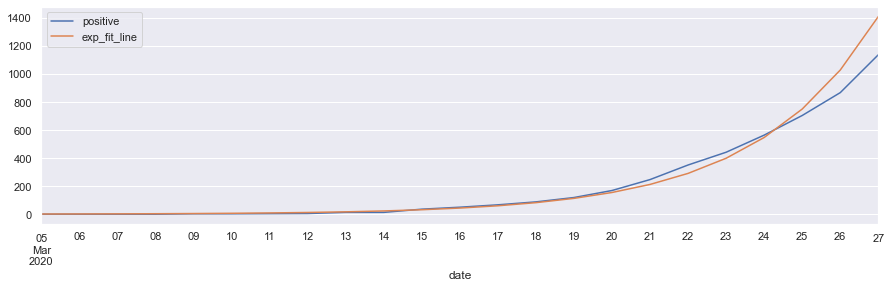

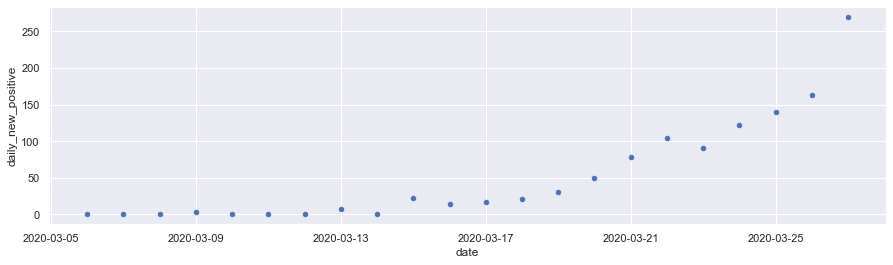

State=MD  (last_update=2020-03-28T10:00)
Doubling every 2.63 days based on last 14 days of data
(naive estimates: current_unresolved=717 hosp=107 icu=28)


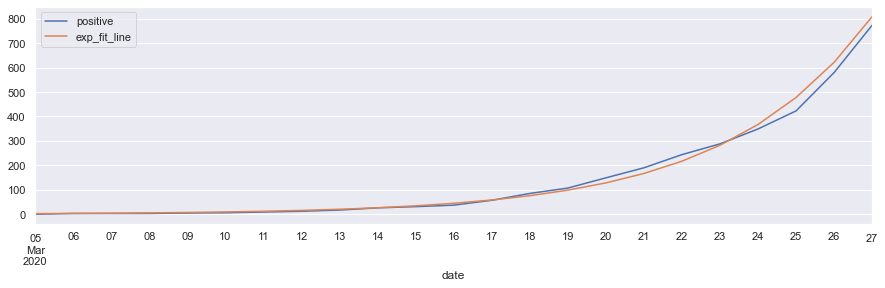

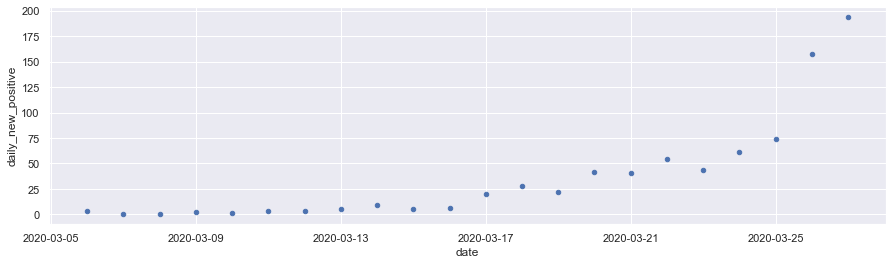

State=WI  (last_update=2020-03-27T16:00)
Doubling every 2.45 days based on last 14 days of data
(naive estimates: current_unresolved=770 hosp=115 icu=30)


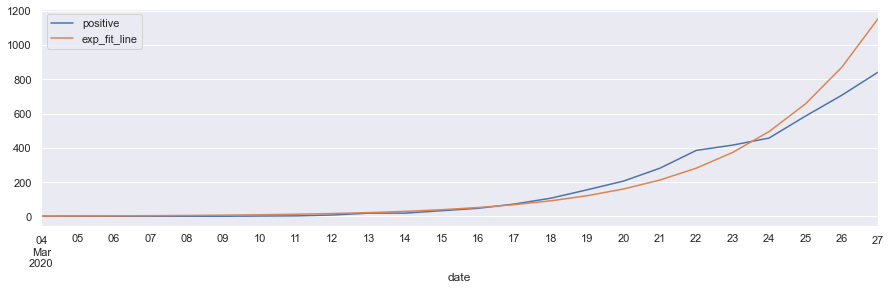

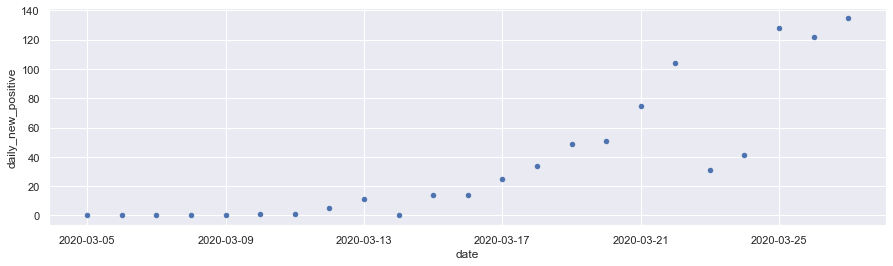

State=NC  (last_update=2020-03-27T11:40)
Doubling every 2.43 days based on last 14 days of data
(naive estimates: current_unresolved=723 hosp=108 icu=28)


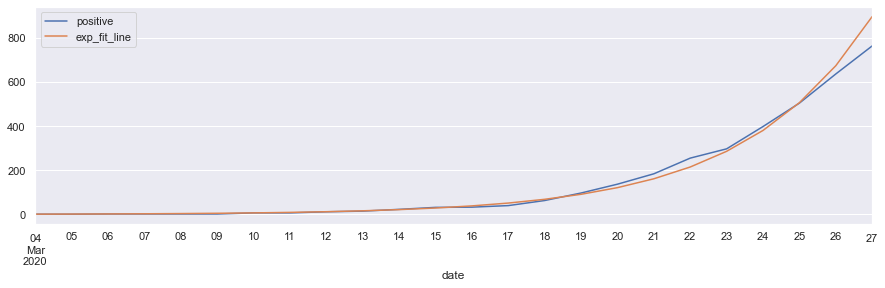

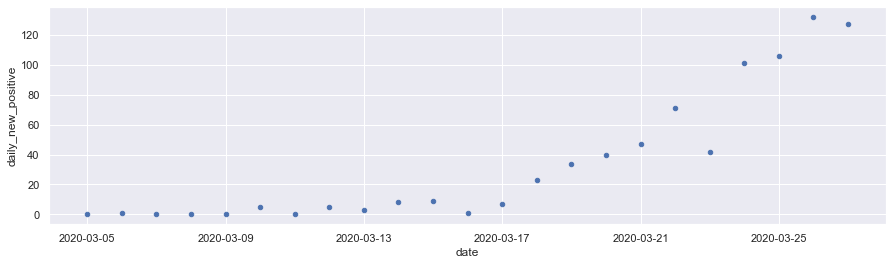

State=VA  (last_update=2020-03-28T00:00)
Doubling every 3.09 days based on last 14 days of data
(naive estimates: current_unresolved=537 hosp=80 icu=21)


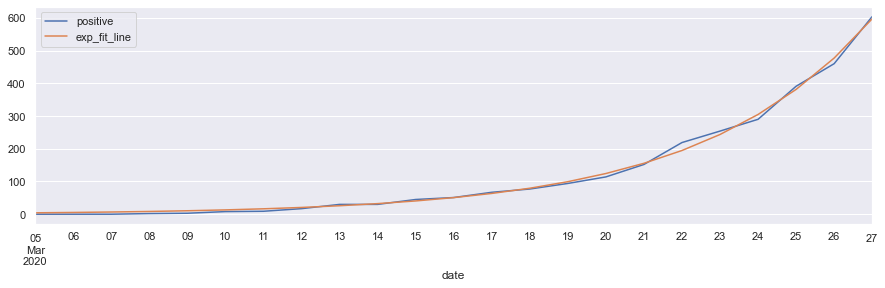

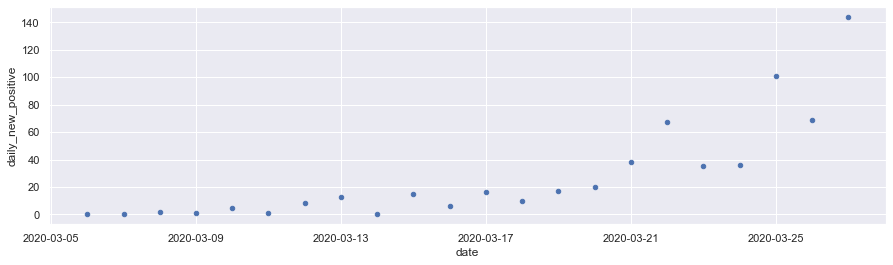

State=AZ  (last_update=2020-03-27T00:00)
Doubling every 1.96 days based on last 14 days of data
(naive estimates: current_unresolved=716 hosp=107 icu=28)


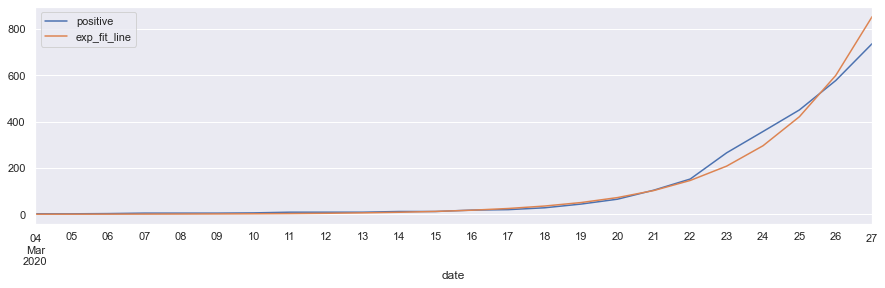

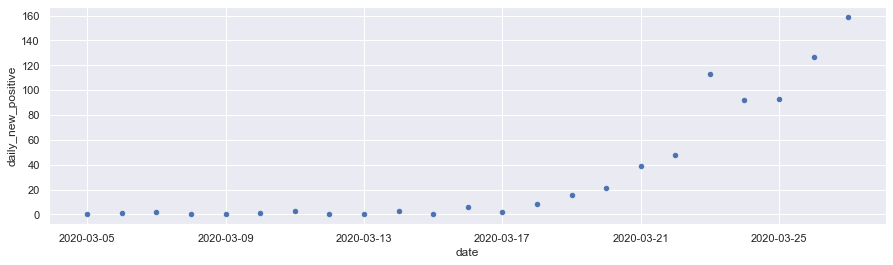

State=MO  (last_update=2020-03-27T15:00)
Doubling every 1.63 days based on last 14 days of data
(naive estimates: current_unresolved=661 hosp=99 icu=26)


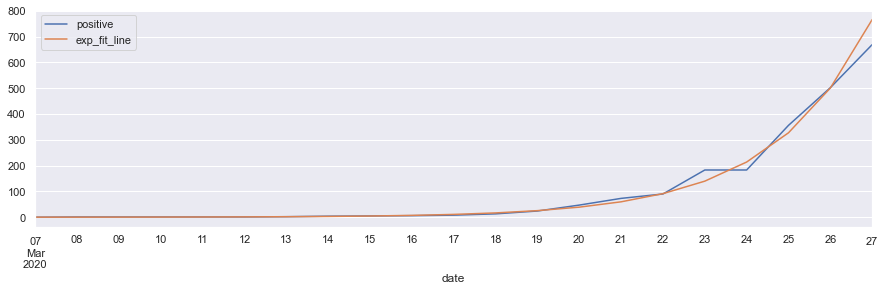

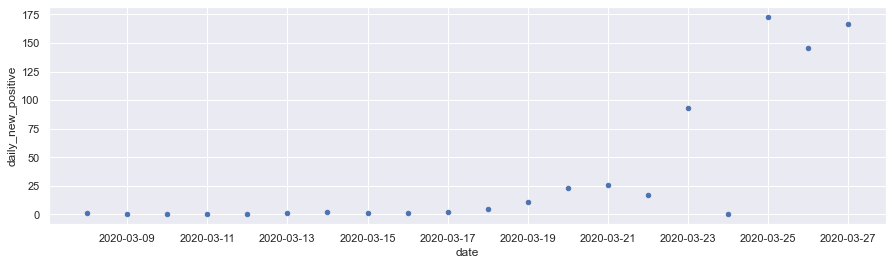

State=AL  (last_update=2020-03-28T00:00)
Doubling every 2.2 days based on last 14 days of data
(naive estimates: current_unresolved=551 hosp=82 icu=22)


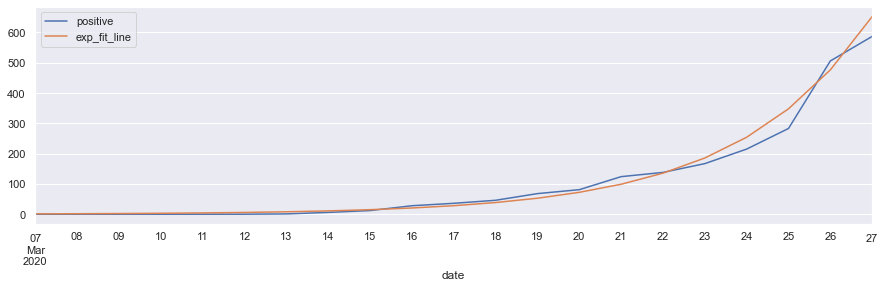

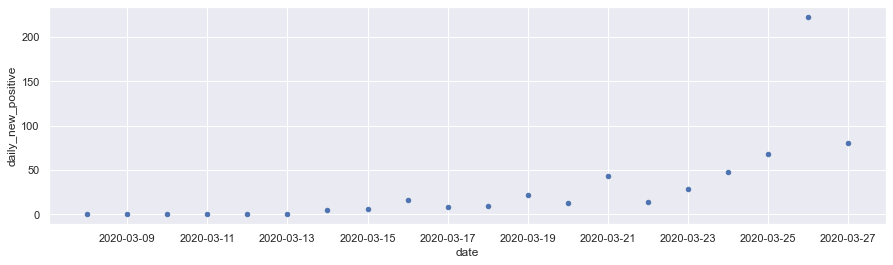

State=NV  (last_update=2020-03-27T22:00)
Doubling every 2.76 days based on last 14 days of data
(naive estimates: current_unresolved=480 hosp=72 icu=19)


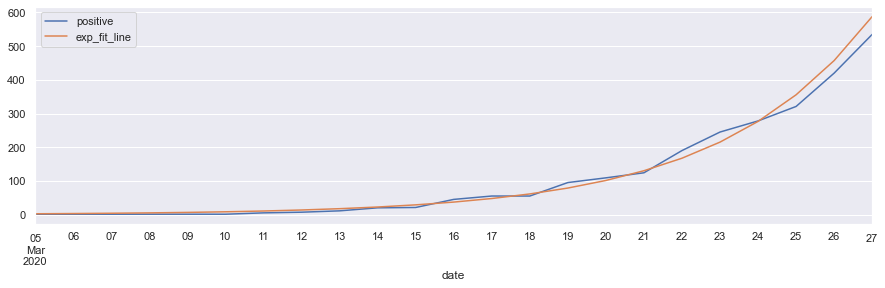

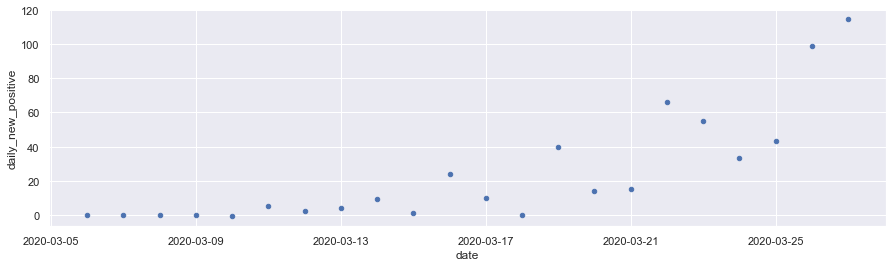

State=MS  (last_update=2020-03-26T19:00)
Doubling every 1.89 days based on last 14 days of data
(naive estimates: current_unresolved=558 hosp=83 icu=22)


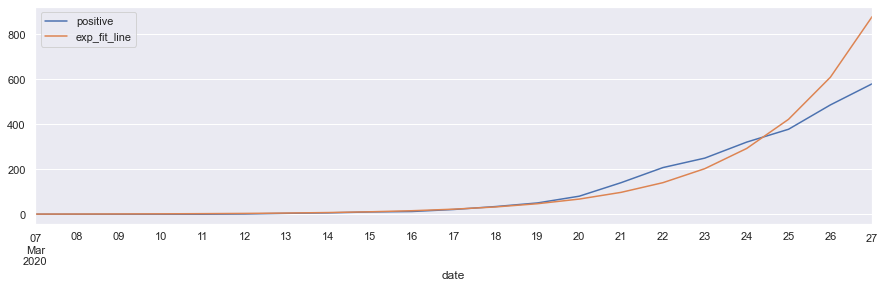

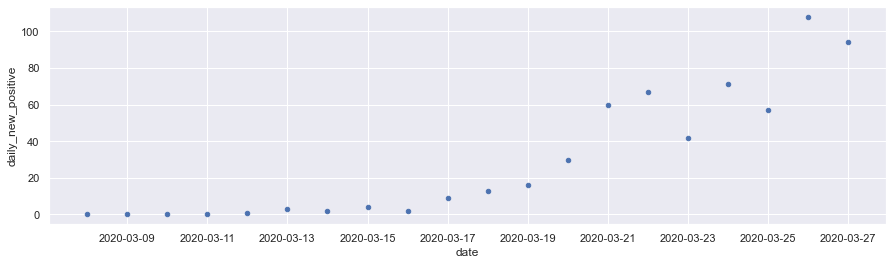

State=SC  (last_update=2020-03-27T16:32)
Doubling every 2.37 days based on last 14 days of data
(naive estimates: current_unresolved=423 hosp=63 icu=16)


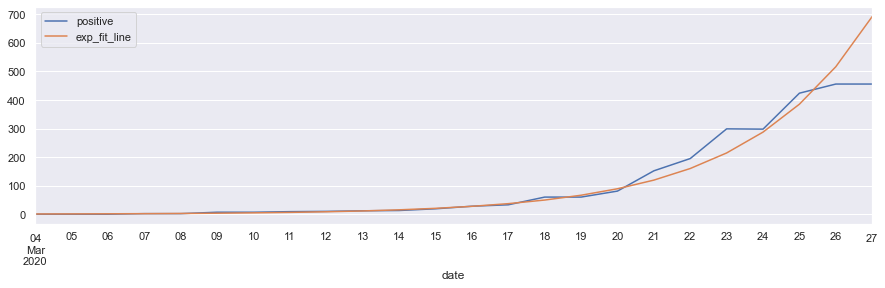

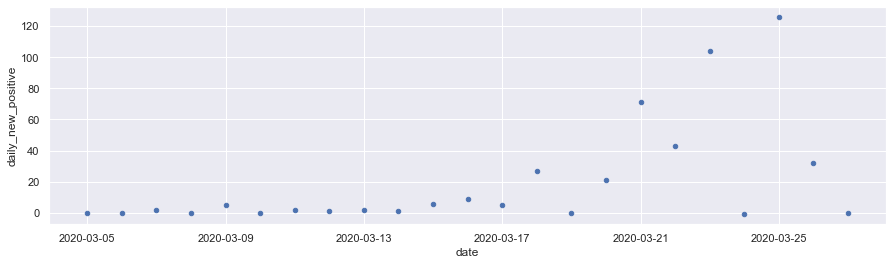

State=UT  (last_update=2020-03-27T15:00)
Doubling every 2.46 days based on last 14 days of data
(naive estimates: current_unresolved=429 hosp=64 icu=17)


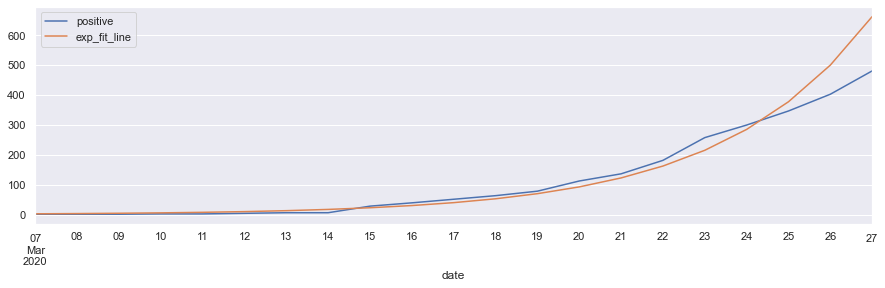

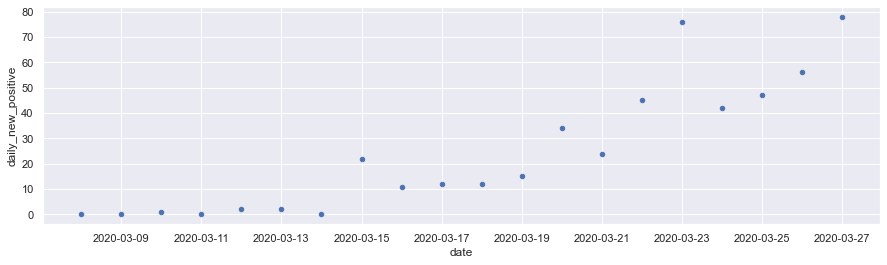

State=OR  (last_update=2020-03-27T12:30)
Doubling every 3.49 days based on last 14 days of data
(naive estimates: current_unresolved=367 hosp=55 icu=14)


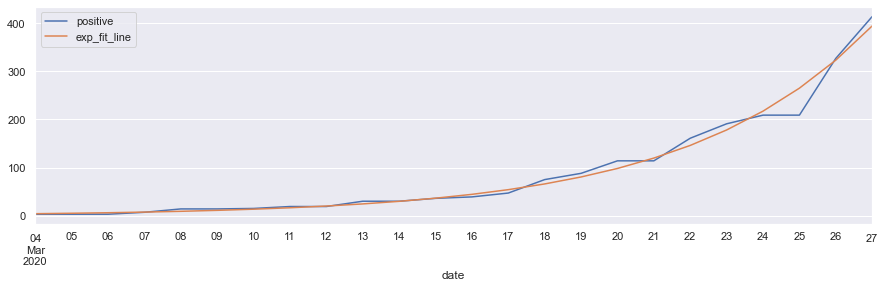

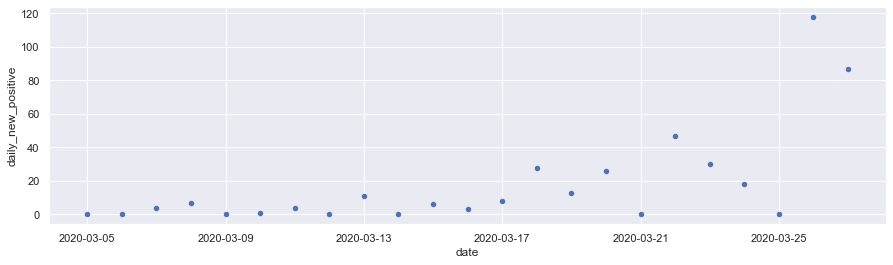

State=MN  (last_update=2020-03-27T00:00)
Doubling every 3.27 days based on last 14 days of data
(naive estimates: current_unresolved=338 hosp=50 icu=13)


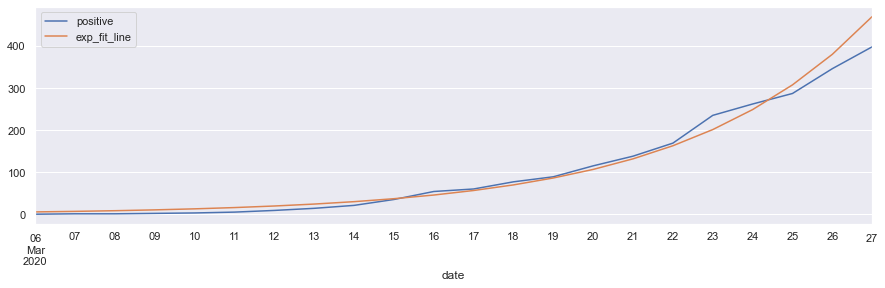

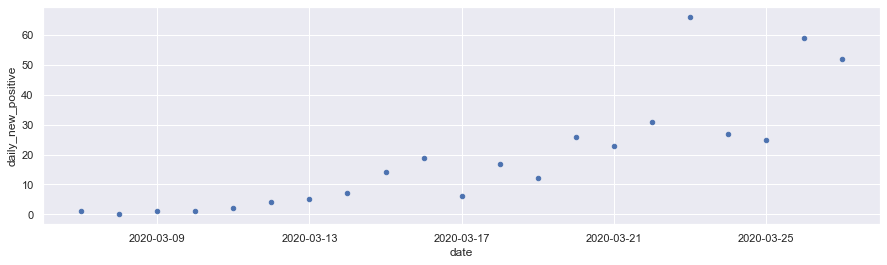

State=AR  (last_update=2020-03-27T23:02)
Doubling every 2.43 days based on last 14 days of data
(naive estimates: current_unresolved=359 hosp=53 icu=14)


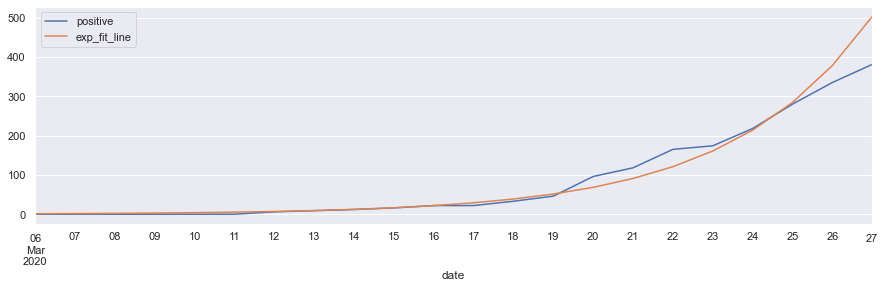

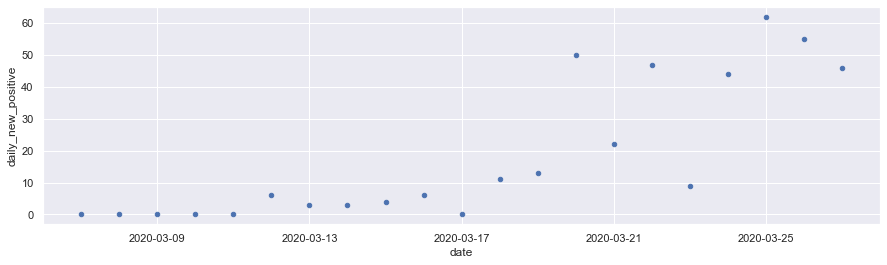

State=OK  (last_update=2020-03-27T08:00)
Doubling every 2.29 days based on last 14 days of data
(naive estimates: current_unresolved=305 hosp=45 icu=12)


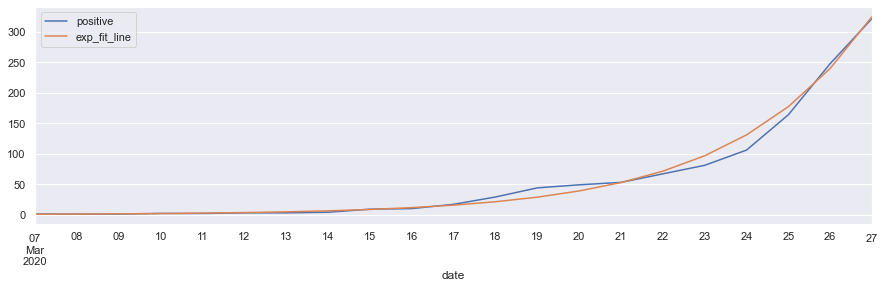

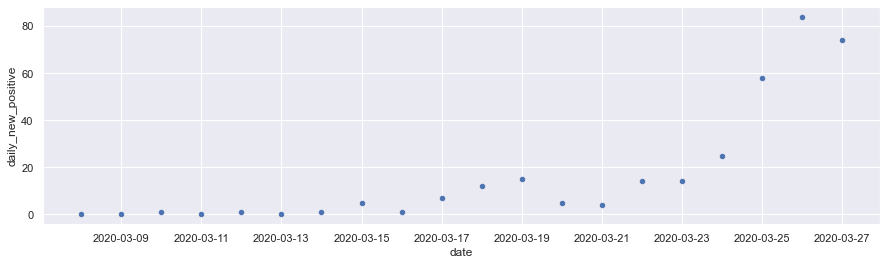

State=DC  (last_update=2020-03-27T20:30)
Doubling every 2.73 days based on last 14 days of data
(naive estimates: current_unresolved=245 hosp=36 icu=9)


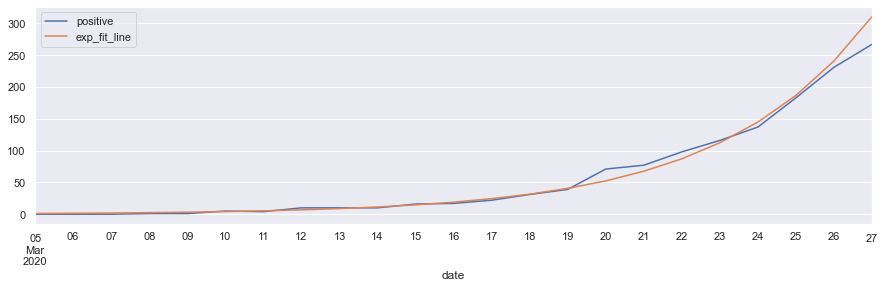

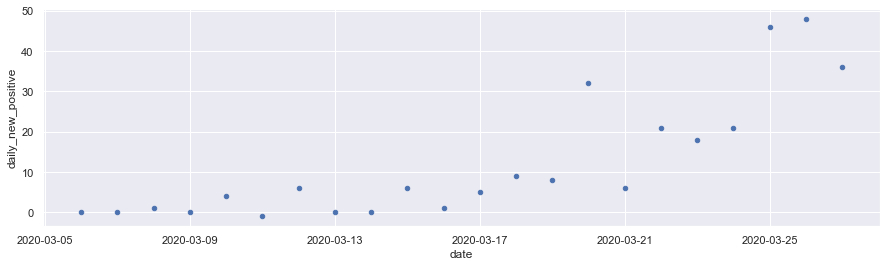

State=KY  (last_update=2020-03-27T17:00)
Doubling every 2.99 days based on last 14 days of data
(naive estimates: current_unresolved=226 hosp=33 icu=9)


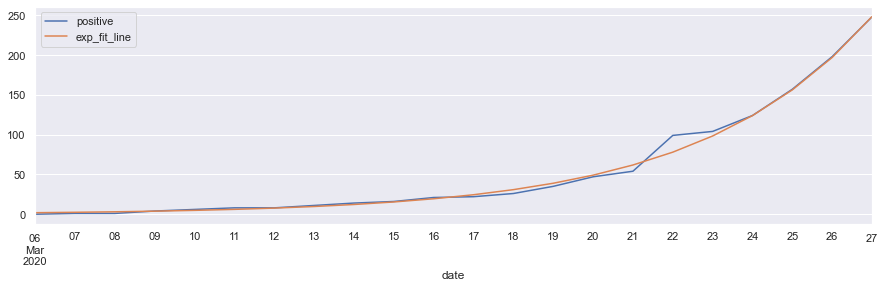

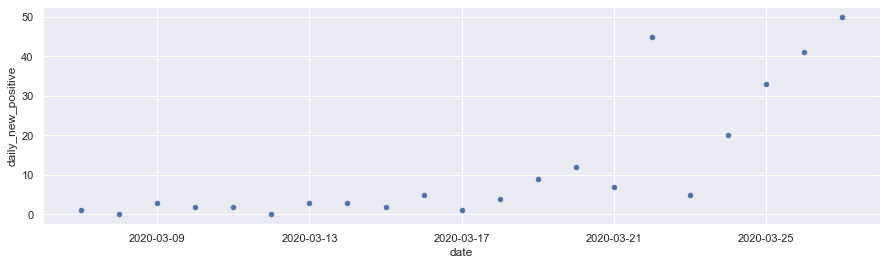

State=IA  (last_update=2020-03-27T15:40)
Doubling every 3.23 days based on last 14 days of data
(naive estimates: current_unresolved=212 hosp=31 icu=8)


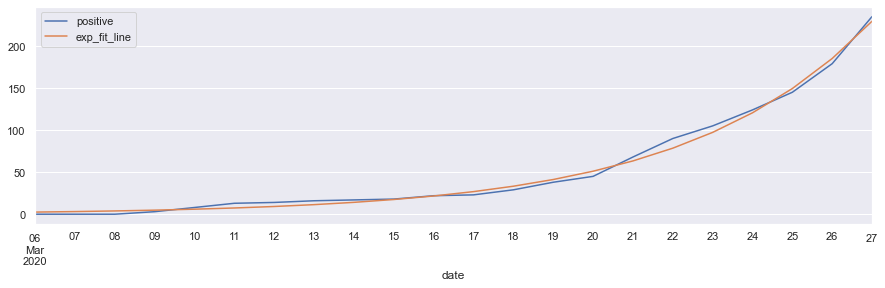

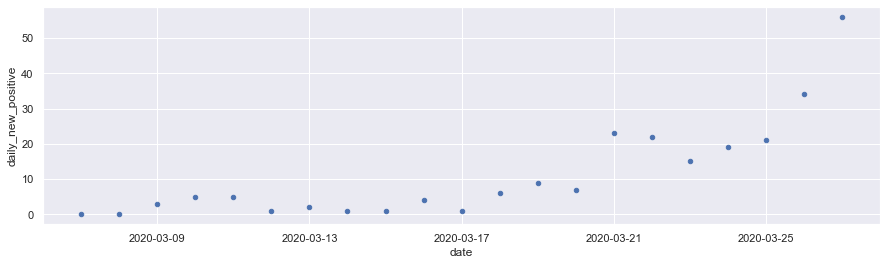

State=ID  (last_update=2020-03-27T19:00)
Doubling every 2.18 days based on last 14 days of data
(naive estimates: current_unresolved=182 hosp=27 icu=7)


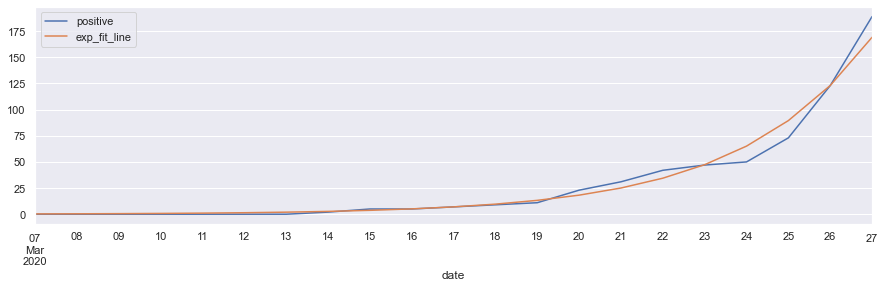

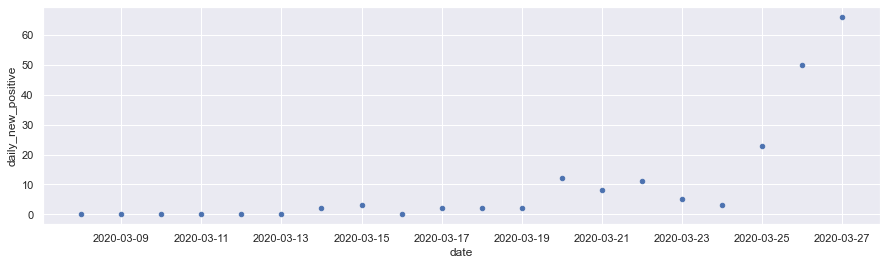

State=RI  (last_update=2020-03-27T00:00)
Doubling every 3.64 days based on last 14 days of data
(naive estimates: current_unresolved=144 hosp=21 icu=5)


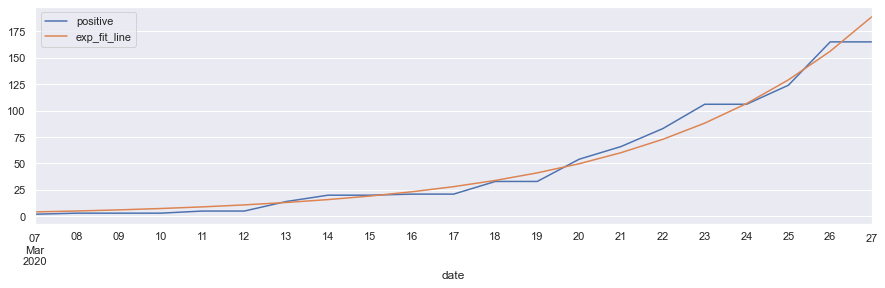

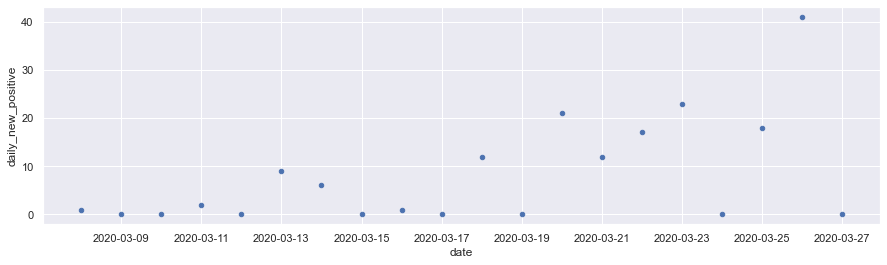

State=KS  (last_update=2020-03-27T09:00)
Doubling every 2.53 days based on last 14 days of data
(naive estimates: current_unresolved=187 hosp=28 icu=7)


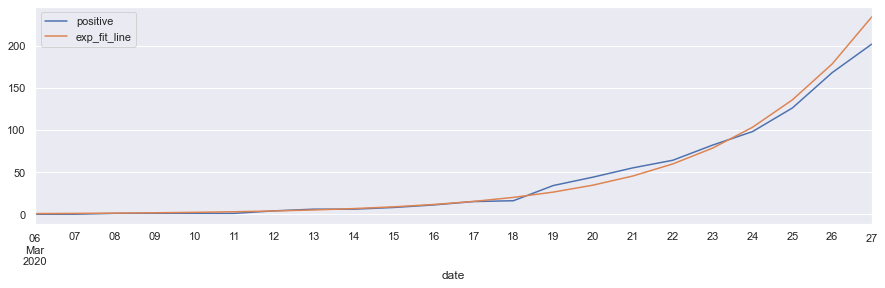

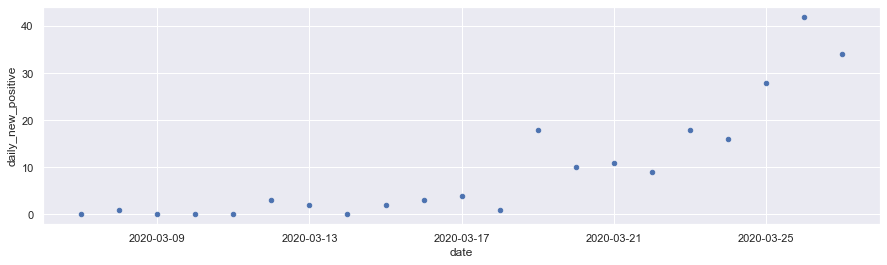

State=NM  (last_update=2020-03-27T00:00)
Doubling every 3.56 days based on last 14 days of data
(naive estimates: current_unresolved=113 hosp=16 icu=4)


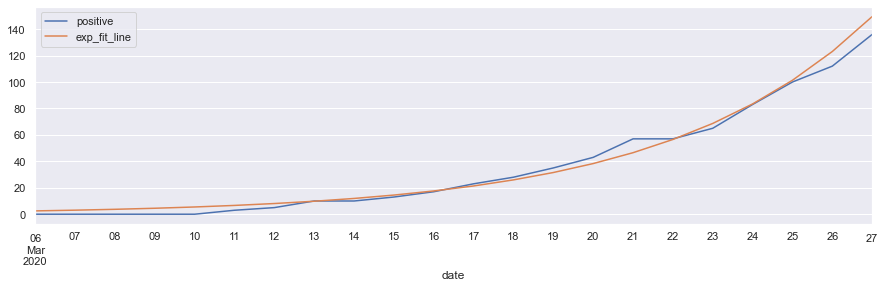

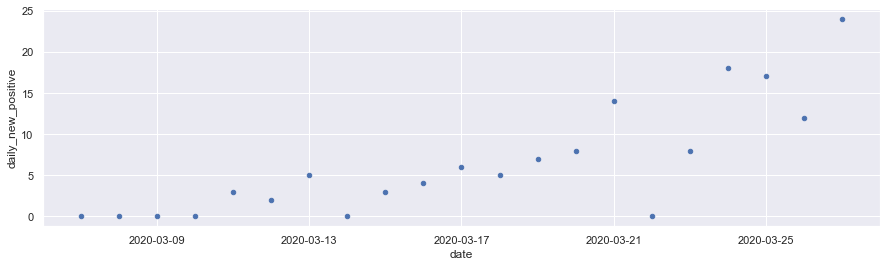

State=NH  (last_update=2020-03-27T09:00)
Doubling every 3.0 days based on last 14 days of data
(naive estimates: current_unresolved=141 hosp=21 icu=5)


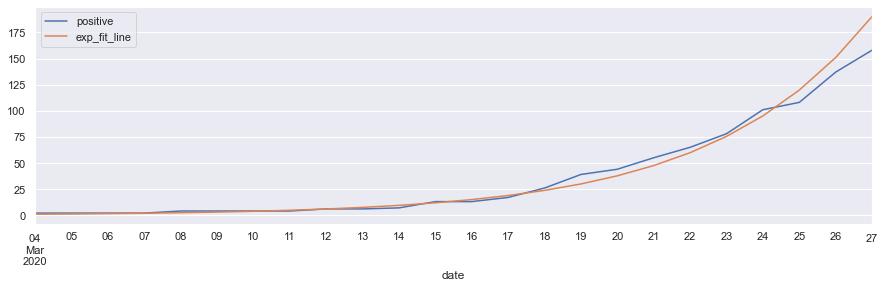

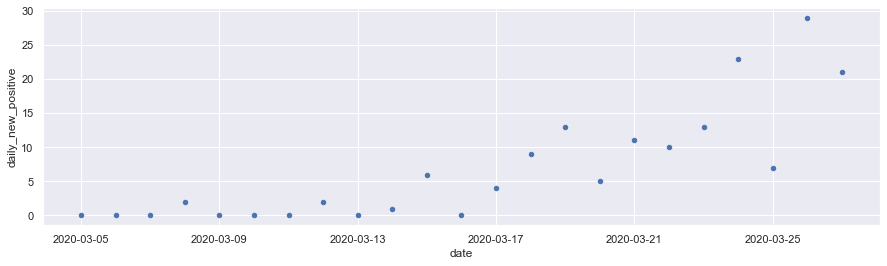

State=VT  (last_update=2020-03-27T13:00)
Doubling every 2.25 days based on last 14 days of data
(naive estimates: current_unresolved=174 hosp=26 icu=6)


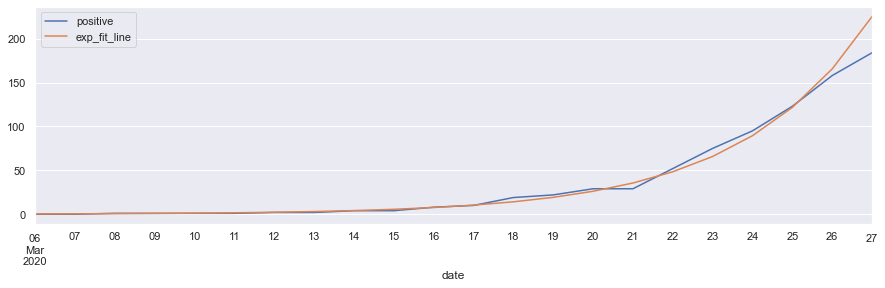

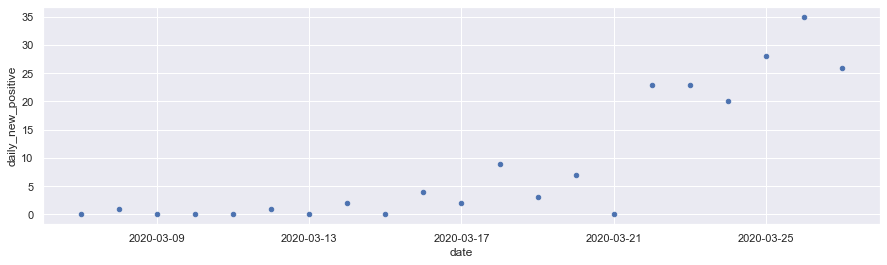

State=ME  (last_update=2020-03-27T11:30)
Doubling every 2.4 days based on last 14 days of data
(naive estimates: current_unresolved=136 hosp=20 icu=5)


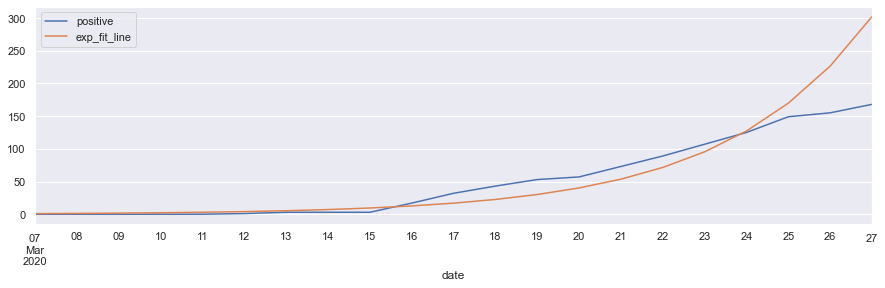

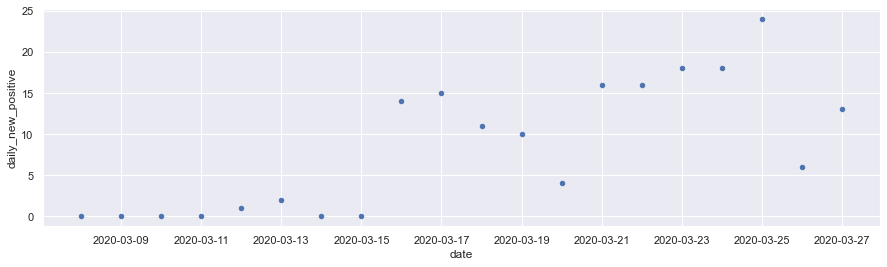

State=DE  (last_update=2020-03-28T00:00)
Doubling every 2.63 days based on last 14 days of data
(naive estimates: current_unresolved=147 hosp=22 icu=5)


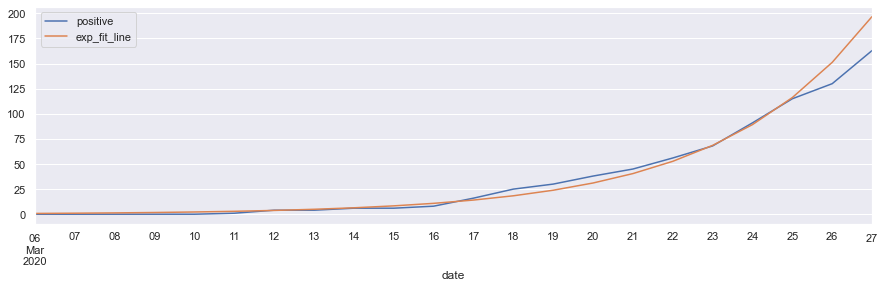

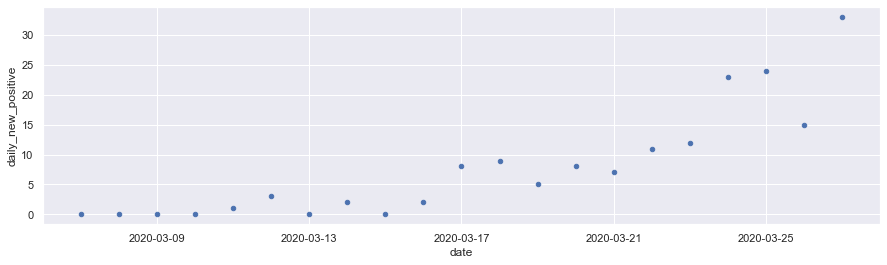

State=MT  (last_update=2020-03-28T10:00)
Doubling every 3.0 days based on last 14 days of data
(naive estimates: current_unresolved=100 hosp=15 icu=4)


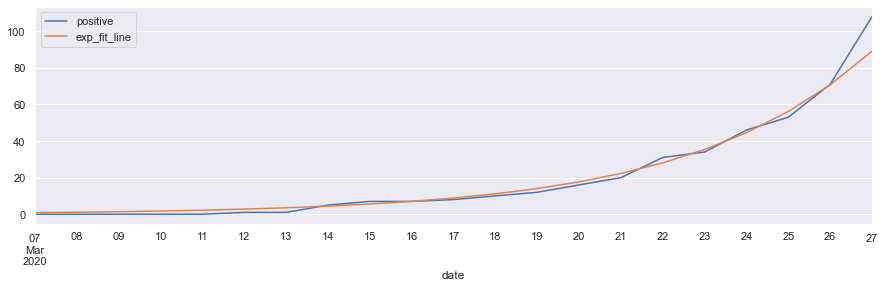

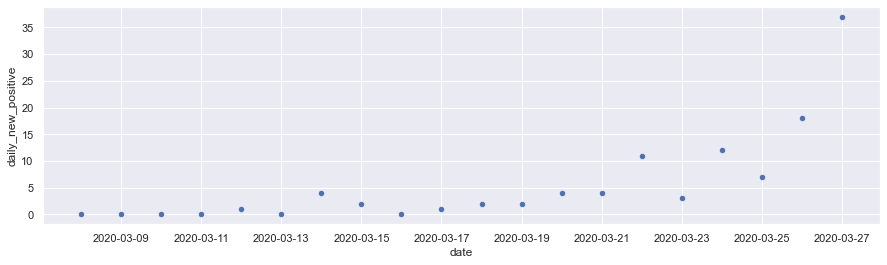

State=HI  (last_update=2020-03-27T18:00)
Doubling every 2.22 days based on last 14 days of data
(naive estimates: current_unresolved=96 hosp=14 icu=3)


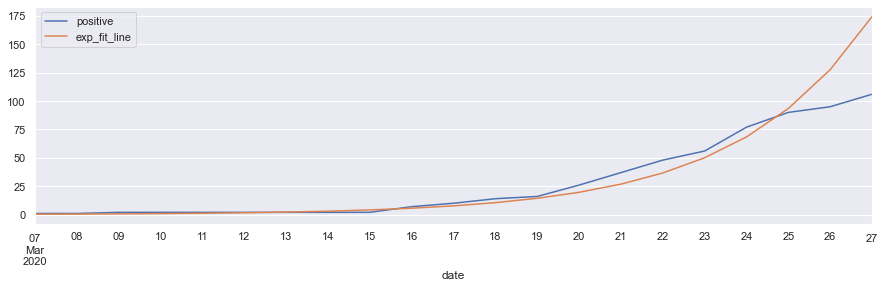

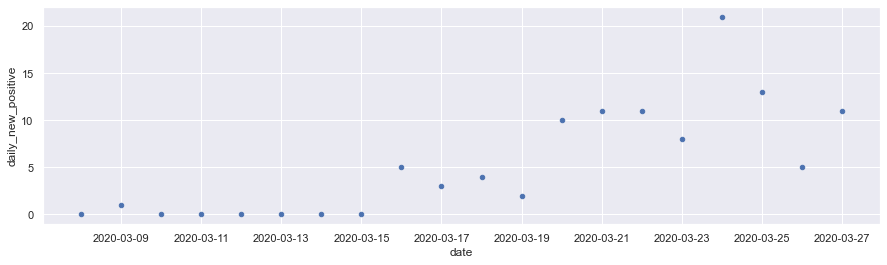

State=PR  (last_update=2020-03-28T07:00)
Doubling every 2.41 days based on last 14 days of data
(naive estimates: current_unresolved=74 hosp=11 icu=2)


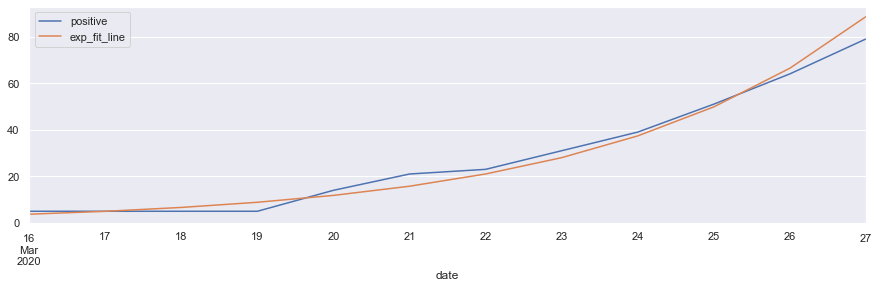

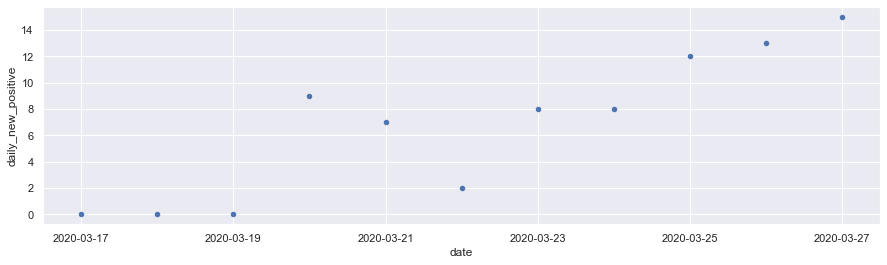

State=WV  (last_update=2020-03-27T00:00)
Doubling every 1.58 days based on last 14 days of data
(naive estimates: current_unresolved=76 hosp=11 icu=3)


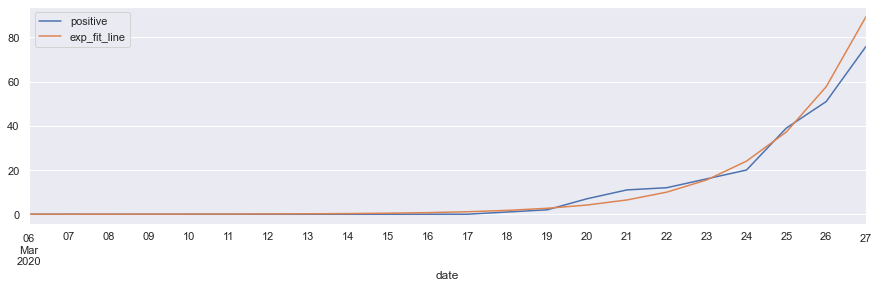

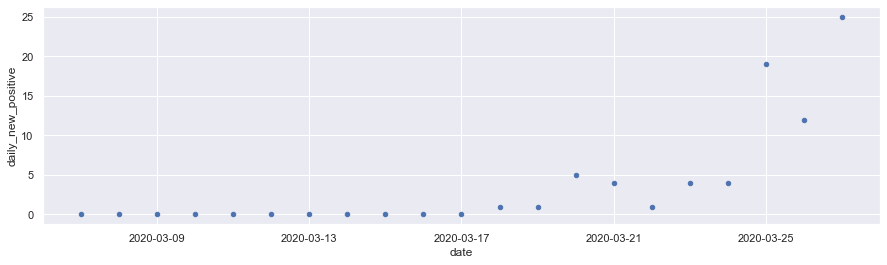

State=NE  (last_update=2020-03-27T20:00)
Doubling every 5.06 days based on last 14 days of data
(naive estimates: current_unresolved=64 hosp=9 icu=2)


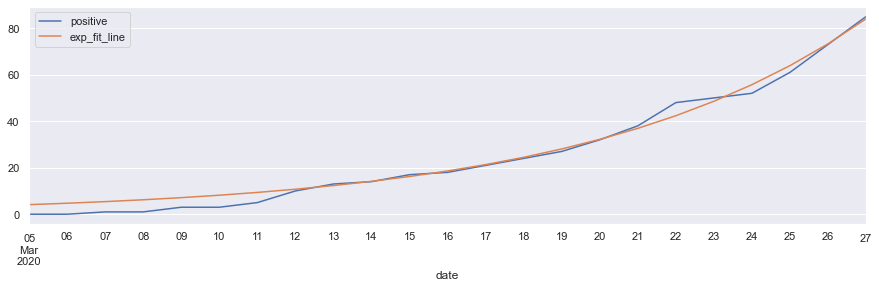

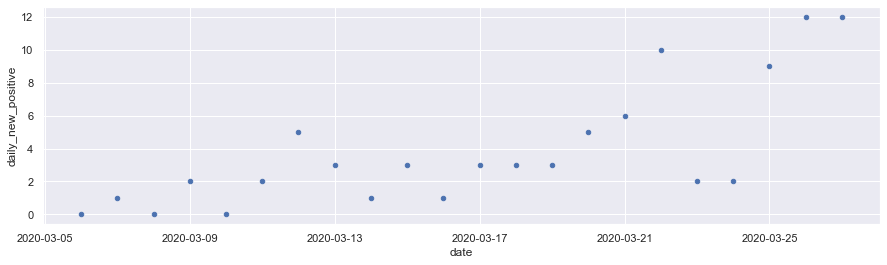

State=AK  (last_update=2020-03-27T19:00)
Doubling every 1.95 days based on last 14 days of data
(naive estimates: current_unresolved=66 hosp=9 icu=2)


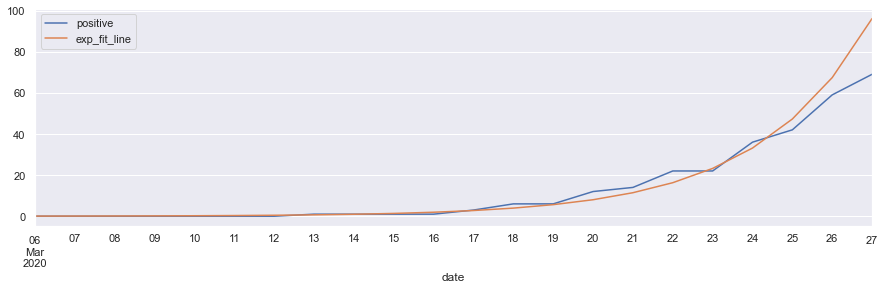

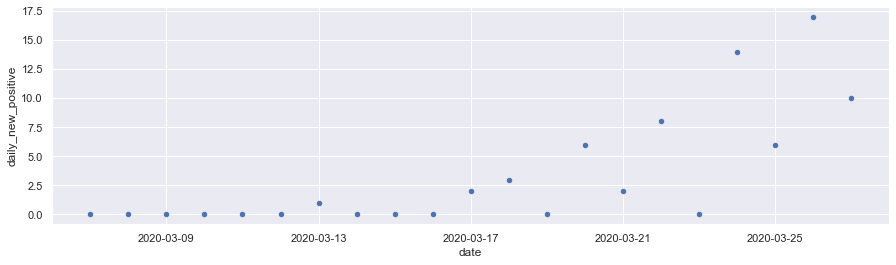

State=WY  (last_update=2020-03-27T20:00)
Doubling every 2.79 days based on last 14 days of data
(naive estimates: current_unresolved=60 hosp=9 icu=2)


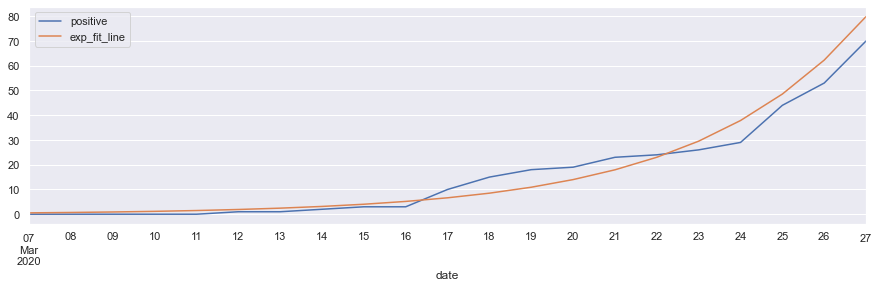

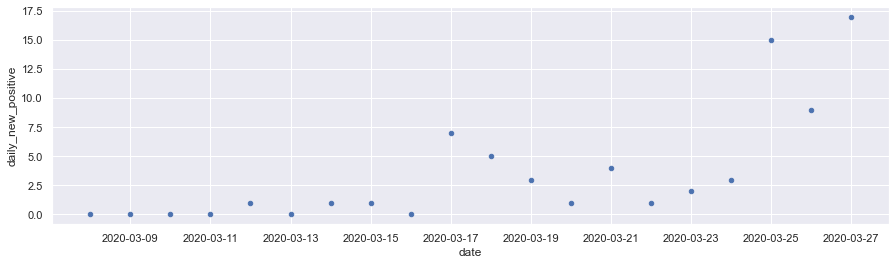

State=ND  (last_update=2020-03-27T17:52)
Doubling every 2.0 days based on last 14 days of data
(naive estimates: current_unresolved=62 hosp=9 icu=2)


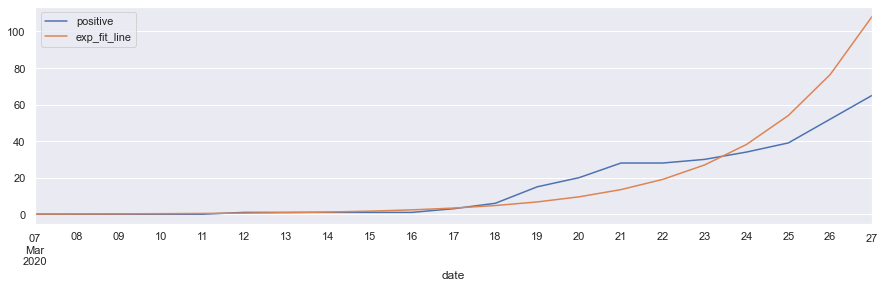

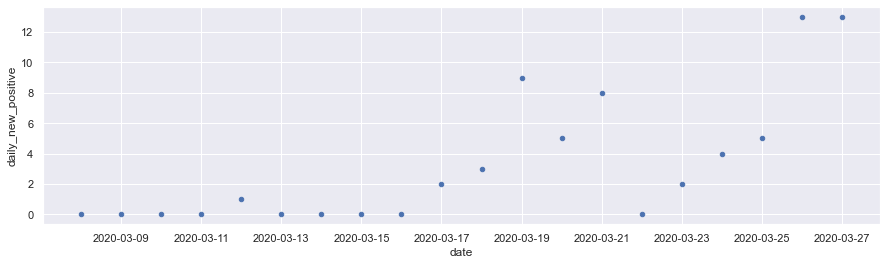

State=SD  (last_update=2020-03-27T12:30)
Doubling every 4.6 days based on last 14 days of data
(naive estimates: current_unresolved=47 hosp=7 icu=1)


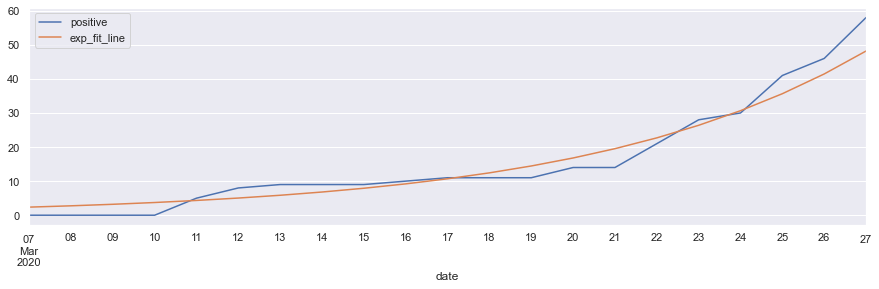

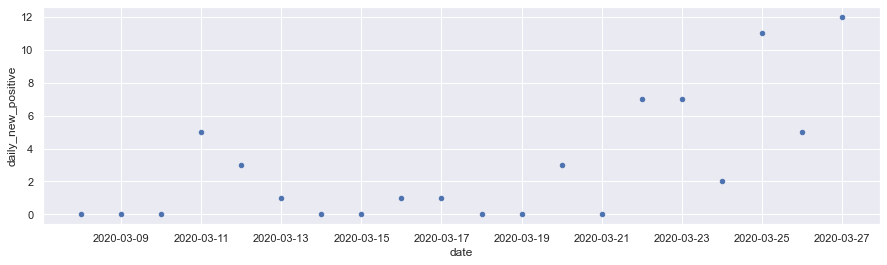

State=GU  (last_update=2020-03-28T03:00)
Doubling every 2.86 days based on last 14 days of data
(naive estimates: current_unresolved=46 hosp=6 icu=1)


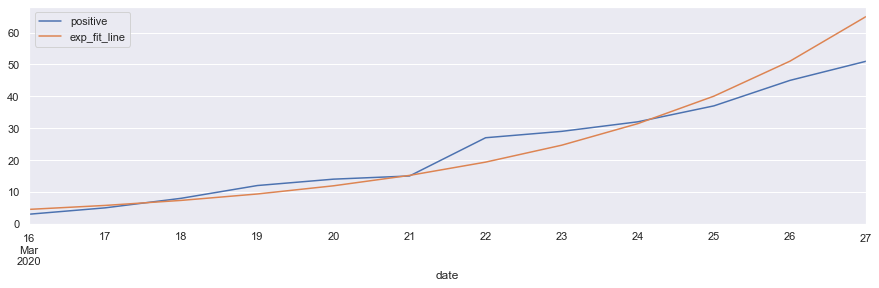

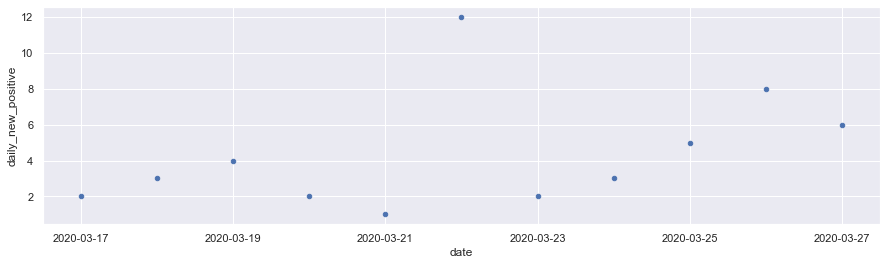

State=VI  (last_update=2020-03-27T14:00)
Doubling every 2.46 days based on last 14 days of data
(naive estimates: current_unresolved=17 hosp=2 icu=0)


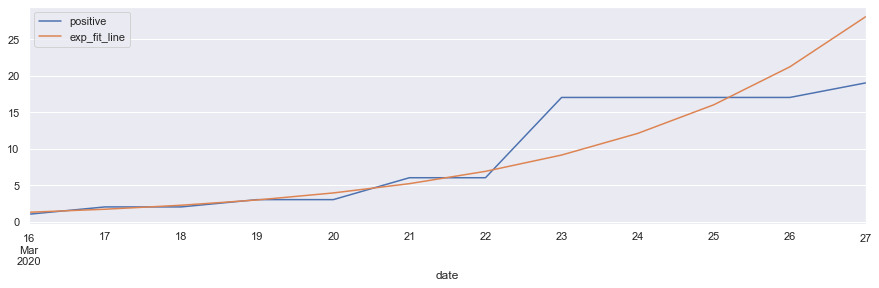

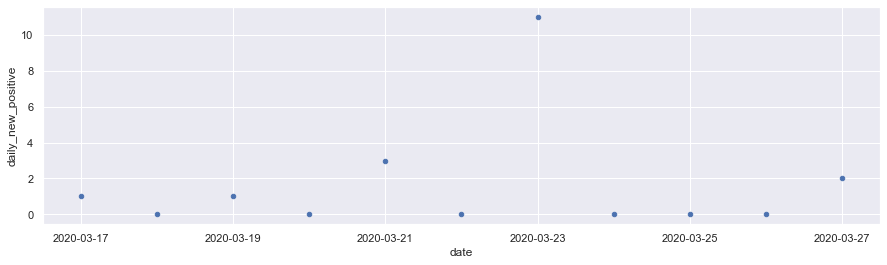

State=MP  (last_update=2020-03-28T04:30)
Doubling every 6.93e+09 days based on last 14 days of data
(naive estimates: current_unresolved=0 hosp=0 icu=0)


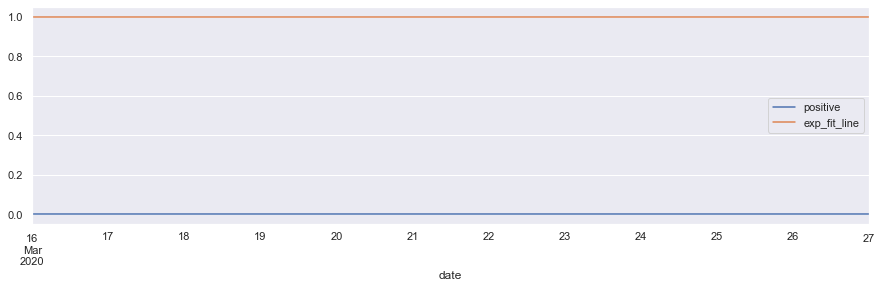

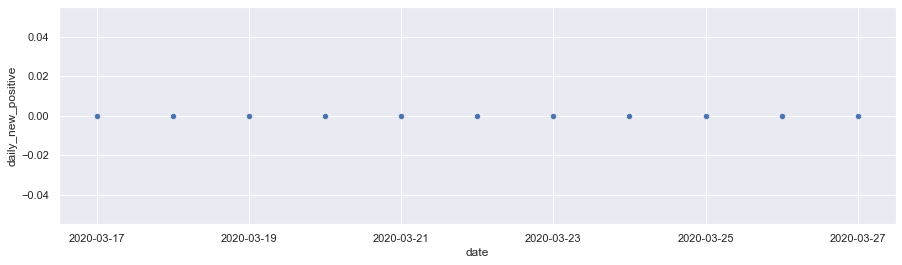

State=AS  (last_update=2020-03-27T00:00)
Doubling every nan days based on last 14 days of data
(naive estimates: current_unresolved=0 hosp=0 icu=0)


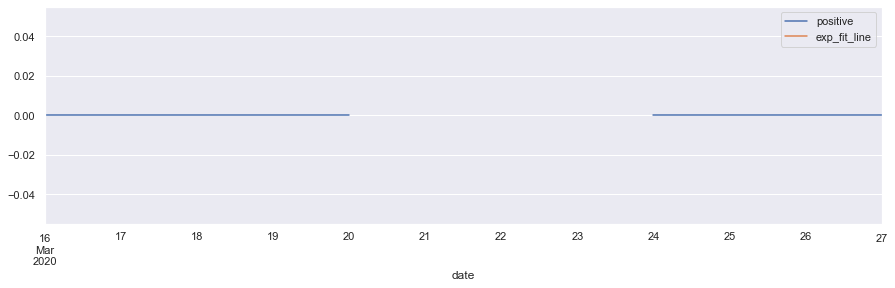

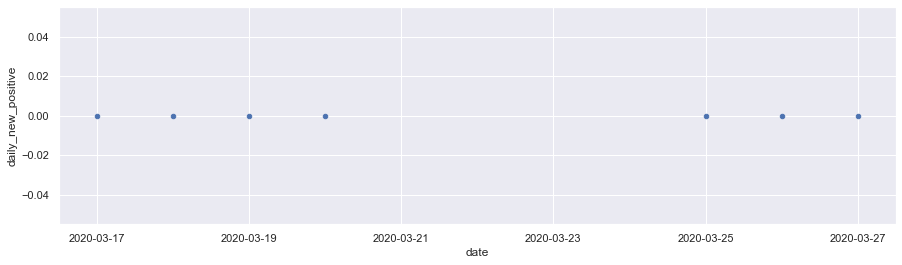

In [13]:
last_n_days = 14
dps = []
for s in states_in_order:
    dfq, dt, lud = get_state_doubling_df(df, s, use_last_n_days=last_n_days)
    dps.append(dt)
    cn, cnh, cni = estimate_current_cases(dfq.daily_new_positive.values)
    lu = str(lud)[:16]
    print("State={}  (last_update={})".format(s, lu))
    print("Doubling every {:.3} days based on last {} days of data".format(dt, last_n_days))
    print("(naive estimates: current_unresolved={} hosp={} icu={})".format(cn, cnh, cni))
    dfq.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
    if len(dfq) > 1:
        dfq.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
    plt.show()

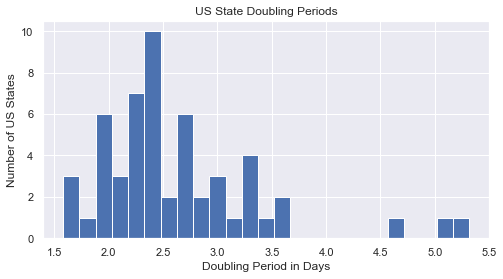

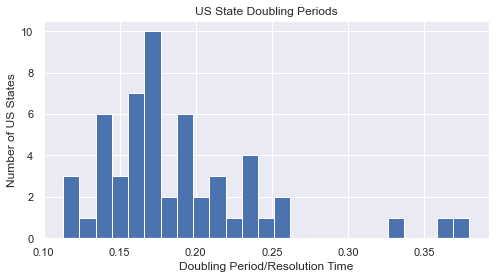

In [14]:
plt.figure(figsize=[8,4])
dps = np.array(dps)
dps = dps[~np.isnan(dps)]
dp_state = dps[dps < 30]
a = plt.hist(dp_state, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period in Days")
plt.ylabel("Number of US States")
plt.show()
# or in terms of resolution time
plt.figure(figsize=[8,4])
resolution_time = 14
a = plt.hist(dp_state/resolution_time, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period/Resolution Time")
plt.ylabel("Number of US States")
plt.show()

### Rolling Doubling Period for US

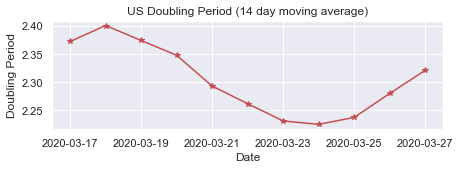

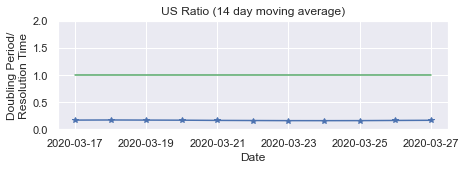

In [15]:
window_size = 14 # days
start_date, end_date = df.date.min(), df.date.max()
delta_t = pd.Timedelta(days=1)
days = int((end_date - start_date).days)
dtv = []
dtt = []
for i in range(days-window_size+2):
    sdt = start_date + i * delta_t
    edt = sdt + window_size * delta_t
    _df = df.loc[(df.date >= sdt) & (df.date < edt)].copy()
    dfa, dt, lud = get_state_doubling_df(_df, "*", use_last_n_days=window_size)
    dtv.append(dt)
    dtt.append(_df.date.values[-1])
plt.figure(figsize=[7,2])
plt.plot(dtt, dtv, "*r-")
plt.title("US Doubling Period ({} day moving average)".format(window_size))
plt.ylabel("Doubling Period")
plt.xlabel("Date")
plt.show()
# by ratio
plt.figure(figsize=[7,2])
plt.plot(dtt, np.array(dtv)/resolution_time, "*b-")
plt.plot(dtt, np.ones(len(dtt)), "g")
plt.title("US Ratio ({} day moving average)".format(window_size))
plt.ylim((0,2))
plt.ylabel("Doubling Period/\nResolution Time")
plt.xlabel("Date")
plt.show()

### Rolling Doubling Period World

In [16]:
def period_factor_plot(dfw, code="CHN", window_size=14, resolution_time=14, ylimit=7):
    dfq, _ = get_state_df(dfw, code)
    try:
        state_name = dfq.Entity.values[0]
    except AttributeError:
        if code == "*":
            state_name = "US"
        else:
            state_name = code
    start_date, end_date = dfq.date.min(), dfq.date.max()
    delta_t = pd.Timedelta(days=1)
    days = int((end_date - start_date).days)
    dtv, dtt = [], []
    for i in range(days-window_size+2):
        sdt = start_date + i * delta_t
        edt = sdt + window_size * delta_t
        _df = dfq.loc[(dfq.date >= sdt) & (dfq.date < edt)].copy()
        dfa, dt, lud = get_state_doubling_df(_df, "*", use_last_n_days=window_size)
        dtv.append(dt)
        dtt.append(_df.date.values[-1])
    plt.figure(figsize=[7,2])
    plt.ylim((0,min([100, 1.1*max(dtv)])))
    plt.plot(dtt, dtv, "*r-")
    plt.title("{} Doubling Period ({} day moving average)".format(state_name, window_size))
    plt.ylabel("Doubling Period")
    plt.xlabel("Date")
    plt.show()
    # by ratio
    plt.figure(figsize=[7,2])
    plt.plot(dtt, np.array(dtv)/resolution_time, "*b-")
    plt.plot(dtt, np.ones(len(dtt)), "g")
    plt.fill_between(dtt, np.ones(len(dtt))*3, np.ones(len(dtt))*5, where=np.ones(len(dtt)), color="yellow", alpha=0.1)
    plt.fill_between(dtt, np.ones(len(dtt))*5, np.ones(len(dtt))*ylimit, where=np.ones(len(dtt)), color="yellow", alpha=0.05)
    plt.fill_between(dtt, np.zeros(len(dtt)), np.ones(len(dtt))*3, where=np.ones(len(dtt)), color="red", alpha=0.1)
    plt.title("{} Ratio ({} day moving average)".format(state_name, window_size))
    plt.ylim((0,ylimit))
    plt.ylabel("Doubling Period/\nResolution Time")
    plt.xlabel("Date")
    plt.show()
    

In [17]:
dfw, wsl = get_world_dataset_df_from_file()
dfw.head()

,Entity,state,Date,positive,date,lastUpdateEt,negative,pending
0,Afghanistan,AFG,"Dec 31, 2019",0,2019-12-31,2020-03-28 21:10:23.603868,0,0
1,Afghanistan,AFG,"Jan 1, 2020",0,2020-01-01,2020-03-28 21:10:23.603868,0,0
2,Afghanistan,AFG,"Jan 2, 2020",0,2020-01-02,2020-03-28 21:10:23.603868,0,0
3,Afghanistan,AFG,"Jan 3, 2020",0,2020-01-03,2020-03-28 21:10:23.603868,0,0
4,Afghanistan,AFG,"Jan 4, 2020",0,2020-01-04,2020-03-28 21:10:23.603868,0,0


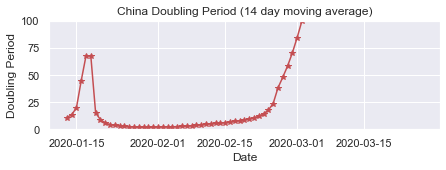

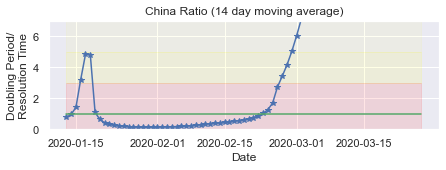

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:75: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


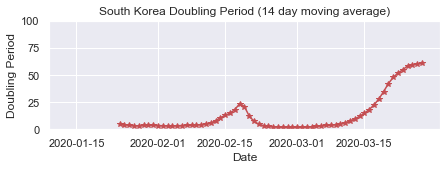

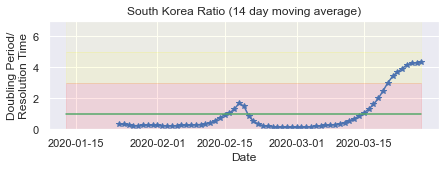

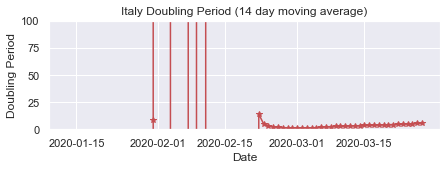

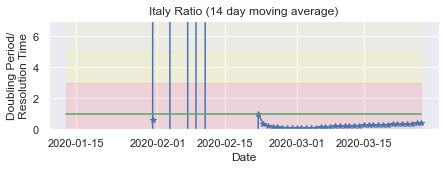

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:75: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


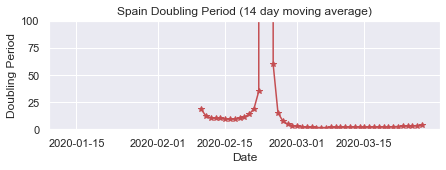

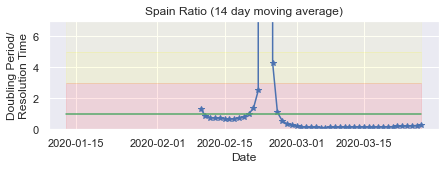

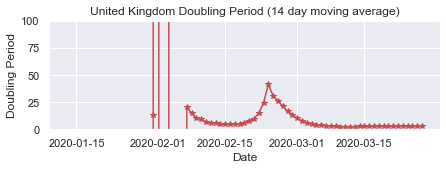

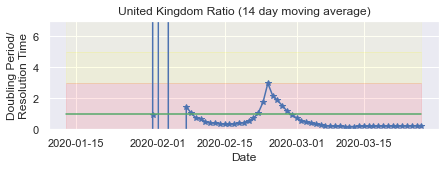

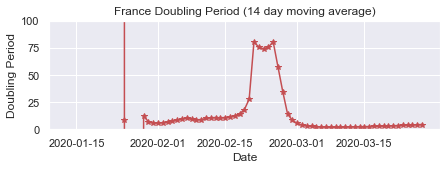

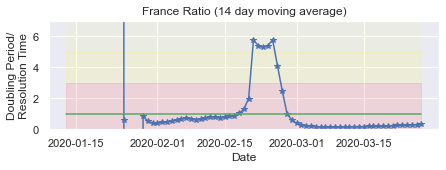

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:75: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


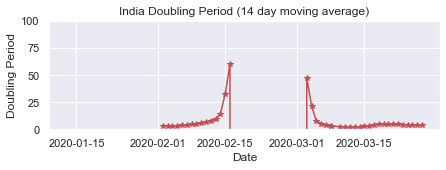

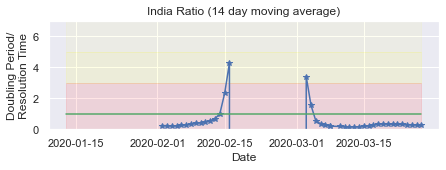

In [18]:
period_factor_plot(dfw,"CHN")
period_factor_plot(dfw,"KOR")
period_factor_plot(dfw,"ITA")
period_factor_plot(dfw,"ESP")
period_factor_plot(dfw,"GBR")
period_factor_plot(dfw,"FRA")
period_factor_plot(dfw,"IND")

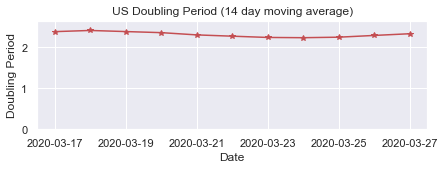

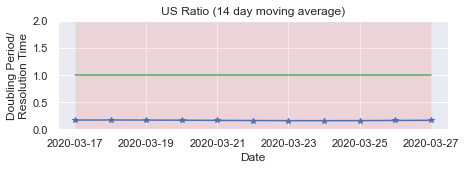

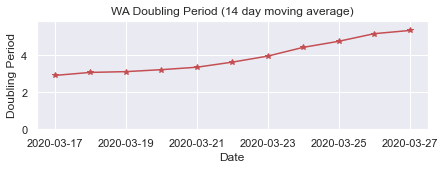

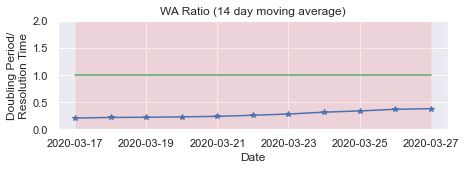

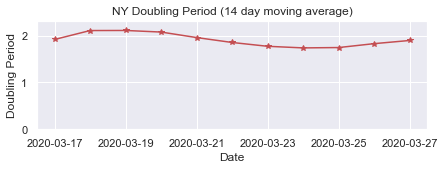

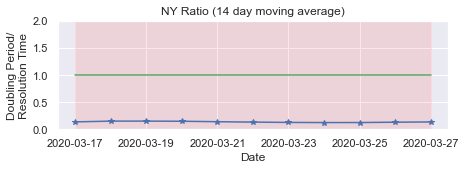

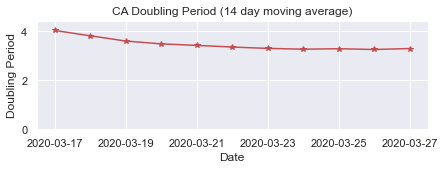

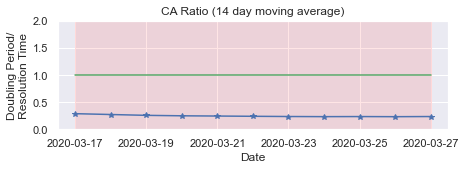

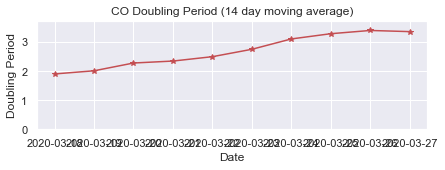

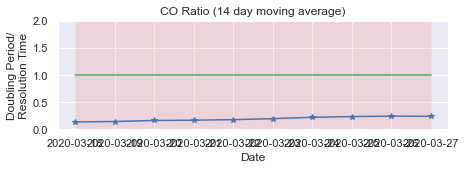

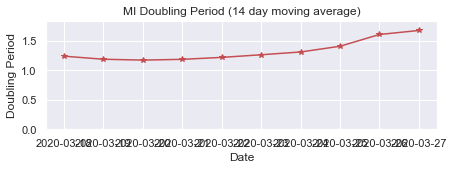

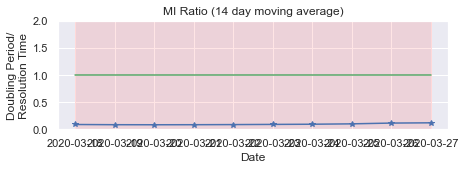

In [19]:
dfw, _ = get_state_df(df, "*")
period_factor_plot(dfw,"*", ylimit=2)
dfw, _ = get_state_df(df, "WA")
period_factor_plot(dfw,"WA", ylimit=2)
dfw, _ = get_state_df(df, "NY")
period_factor_plot(dfw,"NY", ylimit=2)
dfw, _ = get_state_df(df, "CA")
period_factor_plot(dfw,"CA", ylimit=2)
dfw, _ = get_state_df(df, "CO")
period_factor_plot(dfw,"CO", ylimit=2)
dfw, _ = get_state_df(df, "MI")
period_factor_plot(dfw,"MI", ylimit=2)

### Big Grid of Daily Total Cases by State

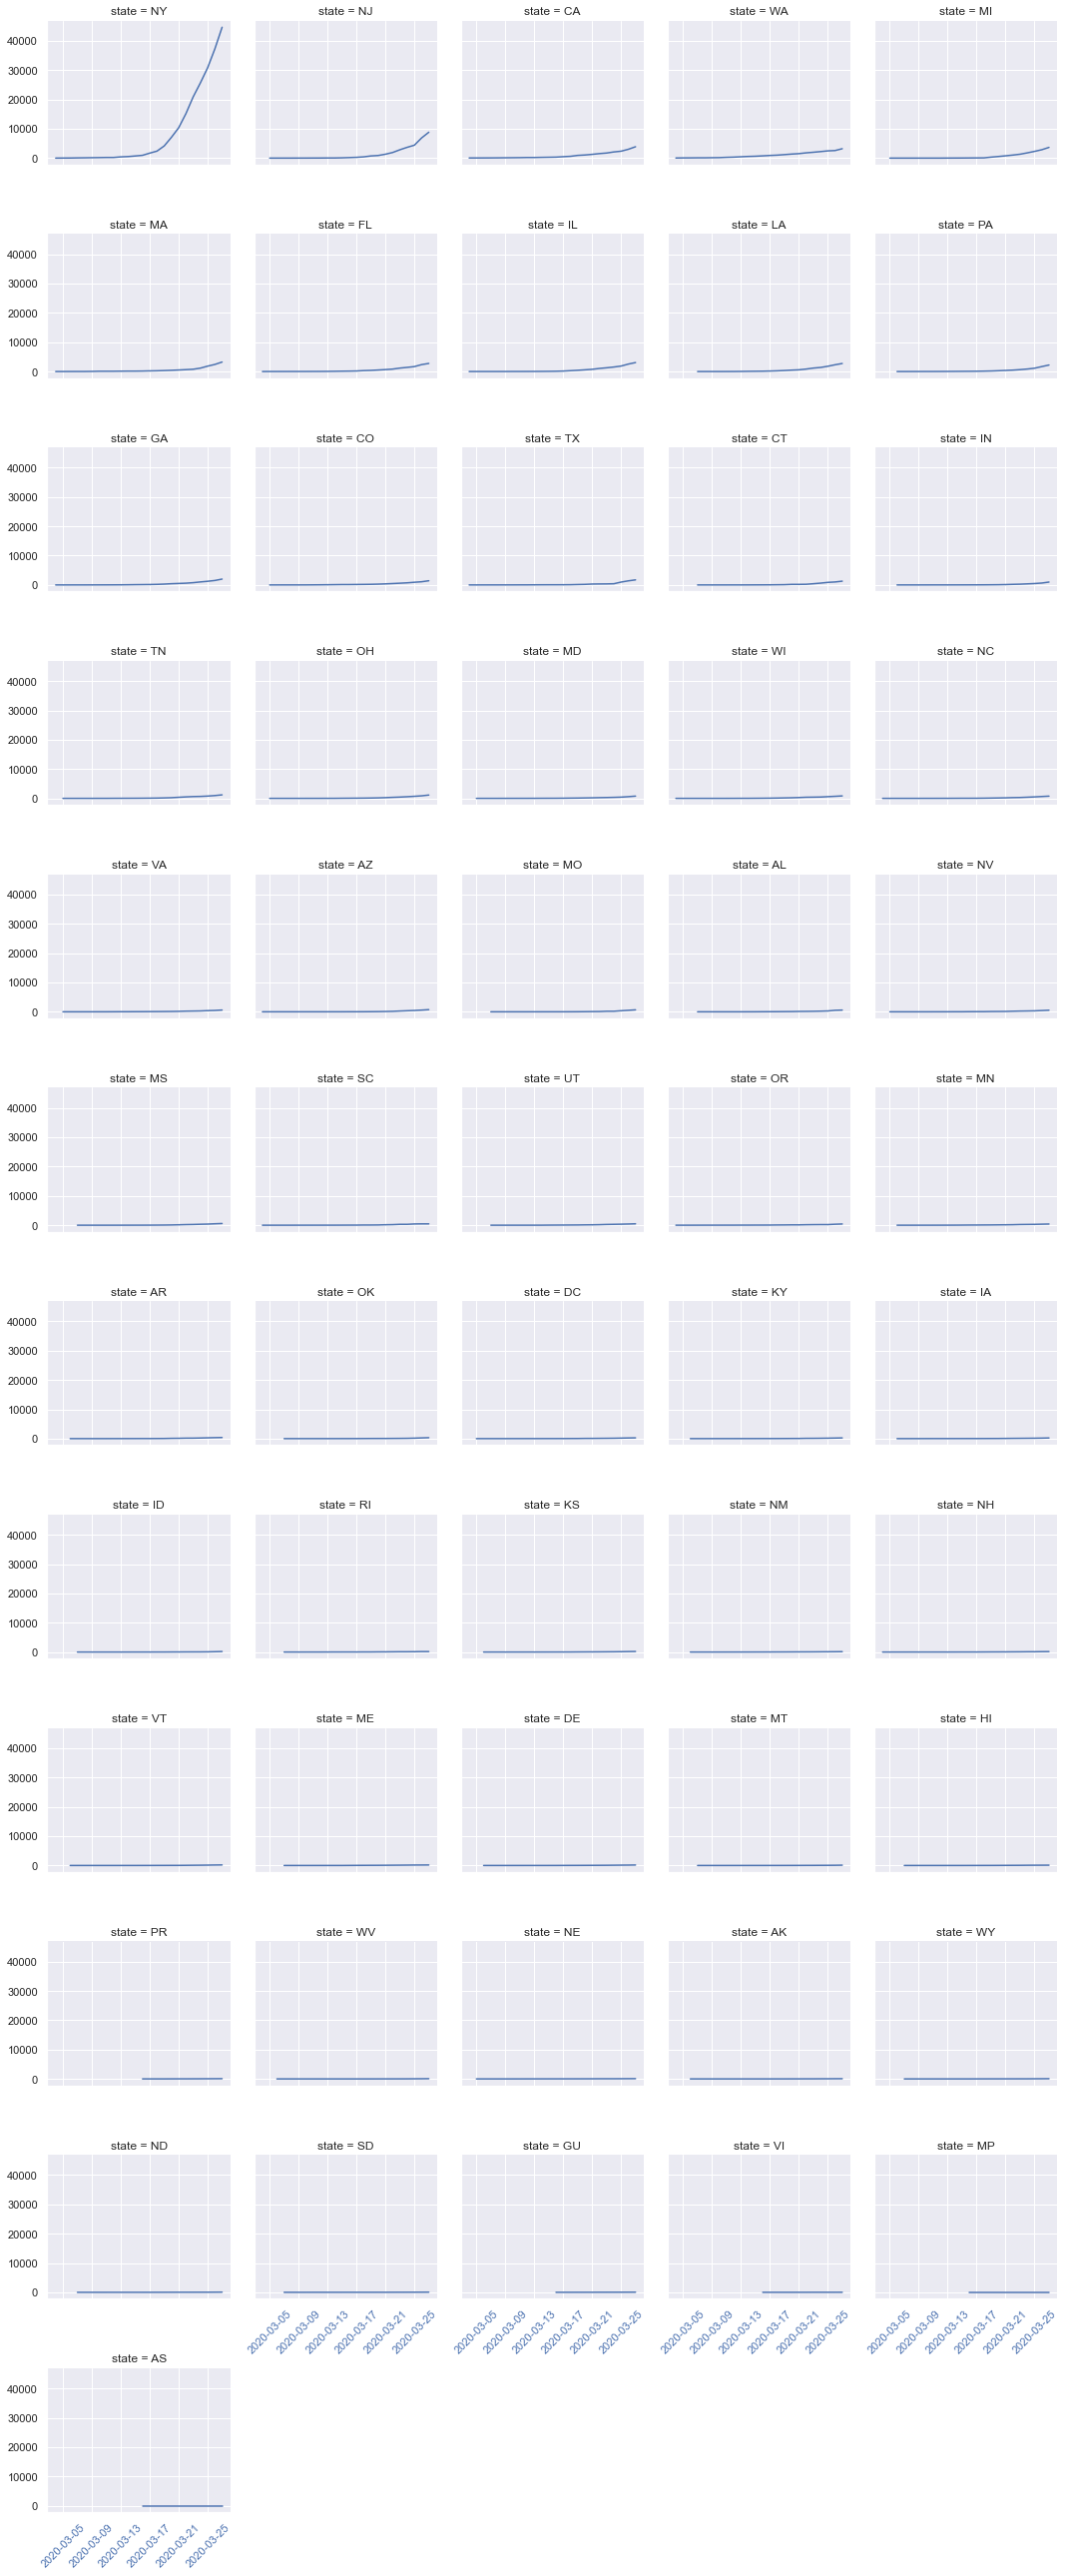

In [20]:
g = sns.FacetGrid(df, col="state", col_wrap=5, height=3, margin_titles=True)
g.map(plt.plot,"date","positive",color="b")
g.map(plt.xticks, rotation=45)

MODEL: US Total Positive, doubling every 2.12 days
(2020-03-28T11:00)


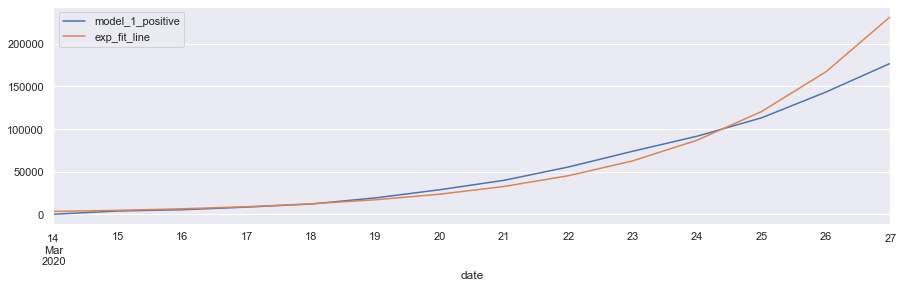

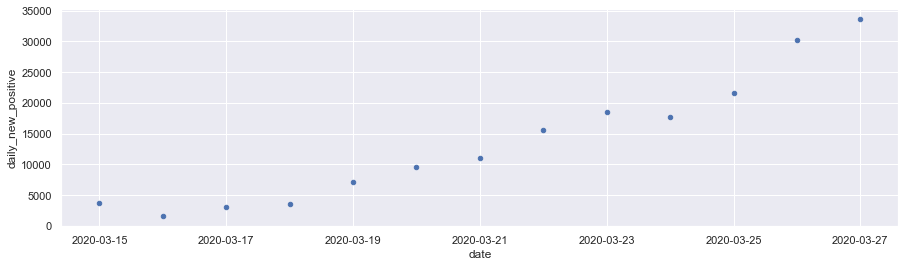

In [21]:
# model of acutals
dfm = model_1_actual_infections(dfa, "*")
dfma, dtm, _ = get_state_doubling_df(dfm, "*", pos_key="model_1_positive")
dfma.plot(x="date", y=["model_1_positive", "exp_fit_line"], figsize=[15,4])
lu = str(lud)[:16]
print("MODEL: US Total Positive, doubling every {:.3} days\n({})".format(dtm, lu))
dfma.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
plt.show()